In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os, sys, subprocess
%load_ext watermark

In [2]:
%watermark

2019-09-24T09:47:10+02:00

CPython 3.6.9
IPython 7.8.0

compiler   : GCC 7.3.0
system     : Linux
release    : 5.0.0-29-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


In [3]:
#parameters
#workingdir = r"/Volumes/GoogleDrive/My Drive/tesi_magistrale/tesi/gtex/hsbm/random_genes"
workingdir=r"/home/fvalle/phd/results/tcga/oversampling_10tissue"
execdir = r"/home/fvalle/phd/master_thesis/"
#dockerurl = "cloudadm@193.144.35.220:/home/cloudadm/master_thesis/hsbm"
dockerurl = "filippo.valle@c3s.unito.it:/archive/home/filippo.valle/hsbm-occam/tcga10"

In [4]:
os.chdir(workingdir)

# Get the data
[Table_creation](Table_creation.ipynb) and [GTex_table_creation](GTex_table_creation) do this for you

# Get annotations

In [17]:
df_file = pd.read_csv("files.dat", index_col=0, header=0)
df_file.groupby(by='primary_site').count()

disease_type
primary_site              
Bone Marrow             78
Brain                   76
Breast                  81
Esophagus                2
Kidney                  86
Lung                    80
Lymph Nodes              2
Ovary                   79
Prostate                82
Soft Tissue              2
Stomach                 70
Thyroid                 80
Uterus                  75

In [6]:
pc=pd.read_csv("%s/genes.txt"%execdir, index_col=[0])
pc=pc[pc['type_of_gene']=='protein-coding']
pc.head()

lenght    type_of_gene     exons
ENSG00000167578   18722.0  protein-coding   18696.0
ENSG00000078237   46830.0  protein-coding   38812.0
ENSG00000146083   11328.0  protein-coding   10691.0
ENSG00000158486  226330.0  protein-coding  217697.0
ENSG00000198242    4966.0  protein-coding    4375.0

# Run statistics
```python
import tacos
tacos.statistics()
tacos.shuffleLabels()
```

CHECK **BioParameters.h** before compiling

In [10]:
os.chdir(workingdir)
os.system("cp %s/addo.py ."%execdir)
os.system("cp %s/tacos/master/data_mining ."%execdir)
os.system("chmod +x data_mining")
os.system("mv mainTable_all.csv mainTable.csv")
os.system("./data_mining 0")
os.system("./data_mining 2")
os.system("python addo.py")

256

In [27]:
os.system("./data_mining 8")#shuffle files

0

# Analyse table and select genes

[Table_Analyser.ipynb](Table_Analyzer.ipynb)

In [12]:
os.chdir(execdir)
from tableanalyser import scalinglawsandoverexpressed

<class 'pandas.core.frame.DataFrame'>
Index: 19369 entries, ENSG00000167578 to ENSG00000181518
Columns: 793 entries, efb7b03d-e283-47be-9233-edf945abb012.htseq.counts.gz to 25b57a17-29ab-41f6-8809-45cf5b58a329.htseq.counts.gz
dtypes: int64(793)
memory usage: 117.3+ MB
None
genes:19369	realizations:793
<class 'pandas.core.frame.DataFrame'>
Index: 19369 entries, ENSG00000167578 to ENSG00000181518
Data columns (total 4 columns):
mean            19369 non-null float64
variance        19369 non-null float64
type_of_gene    19369 non-null object
occurrence      19369 non-null float64
dtypes: float64(3), object(1)
memory usage: 756.6+ KB
None


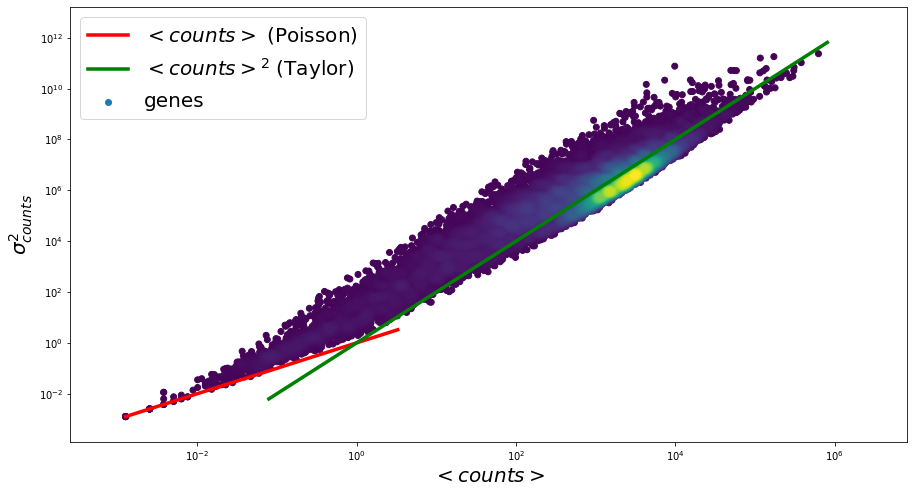

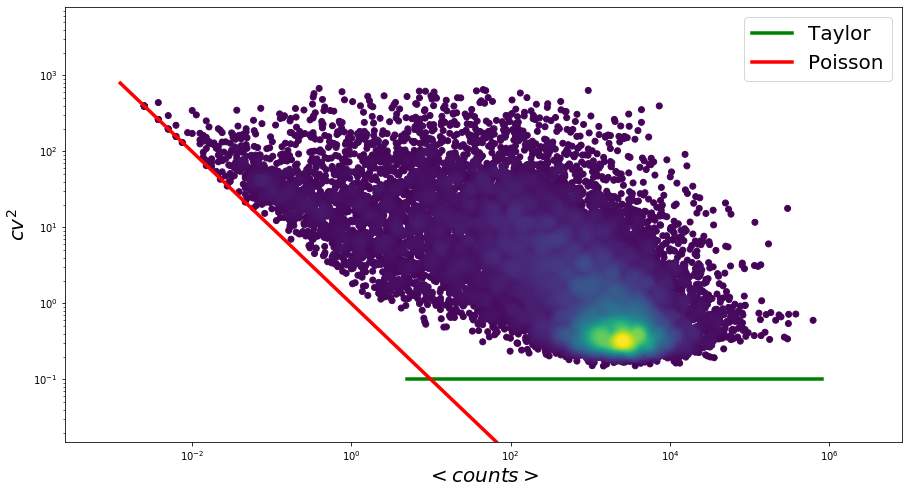

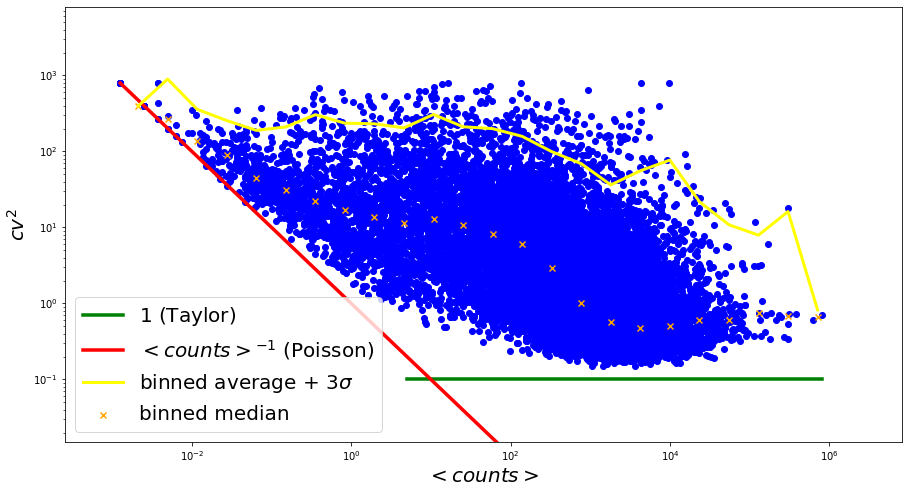

found 3739 highly variable genes


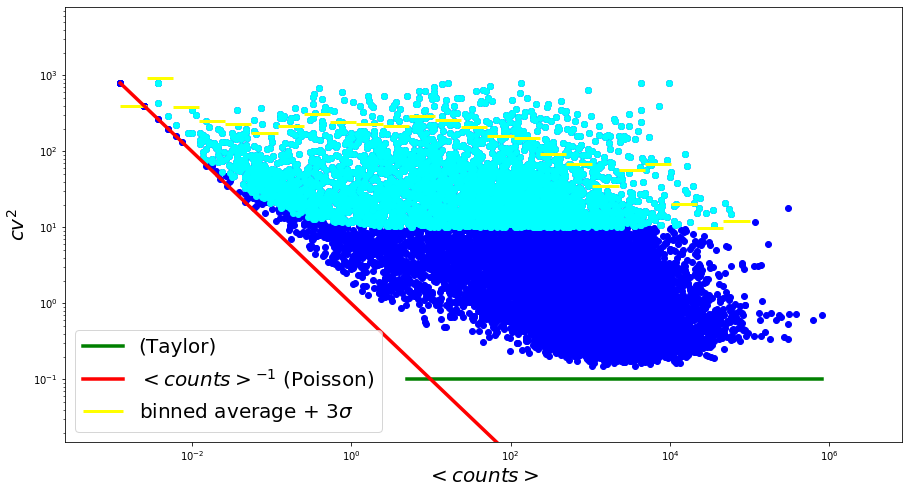

In [13]:
scalinglawsandoverexpressed(workingdir)

In [14]:
os.chdir(workingdir)
os.system("mv mainTable.csv mainTable_all.csv")
os.system("mv mainTable_over.csv mainTable.csv")

0

# Make bipartite network
```bash
python addo.py
```
```python
import tacos
tacos.makegraph()
```

In [31]:
os.chdir(workingdir)
os.system("./data_mining 0")
os.system("./data_mining 2")
os.system("python addo.py")
os.system("./data_mining 7")

0

In [32]:
os.system("scp graph.xml.gz %s/."%dockerurl)

0

[hSBM.ipynb]()

# Run stochastic block model
```
docker run -it -d -v $PWD:/home/filippo fvalle01/hsbm
```

download the data

In [17]:
os.chdir(workingdir)
os.system("mkdir -p topsbm")
os.system('bash -c "scp %s/* topsbm/."'%dockerurl)

256

# Run cluster analysis

In [7]:
os.chdir(execdir)
from hsbmpy import clusteranalysis, get_scores, add_score_lines, getclustersizesarray
#geneontology

In [8]:
os.chdir(execdir)
import hsbmpy, importlib
importlib.reload(hsbmpy)
from hsbmpy import clusteranalysis, get_scores, add_score_lines, getclustersizesarray
os.chdir(workingdir)

True disease_type 3


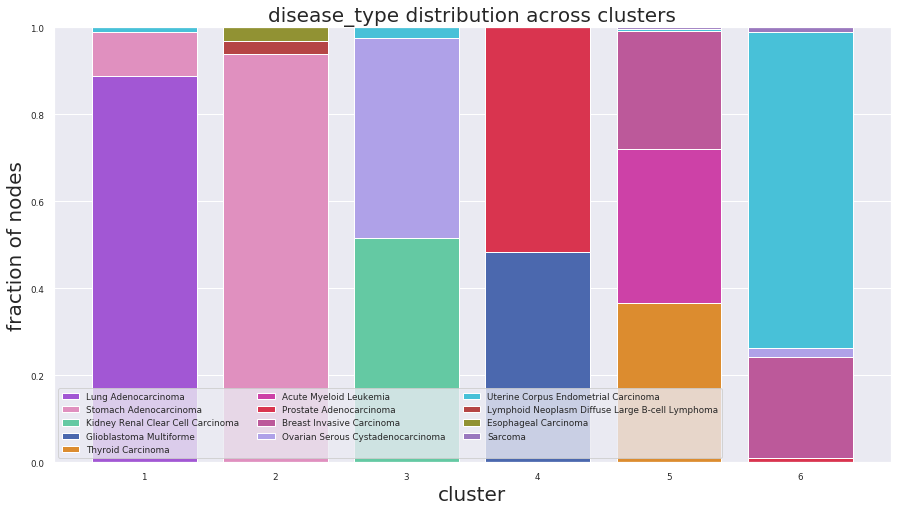

must shuffle files
True disease_type 2


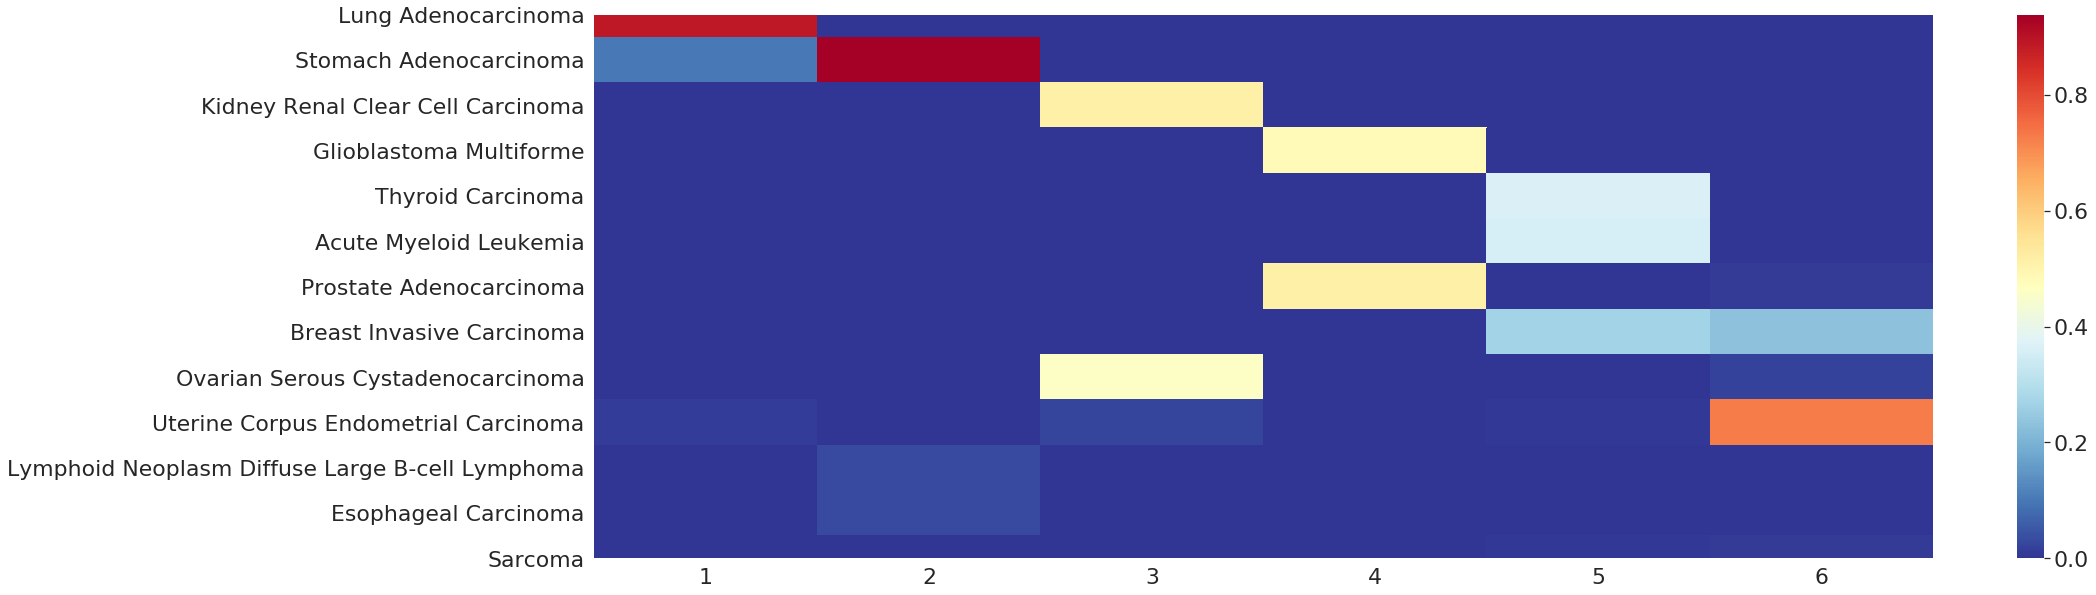

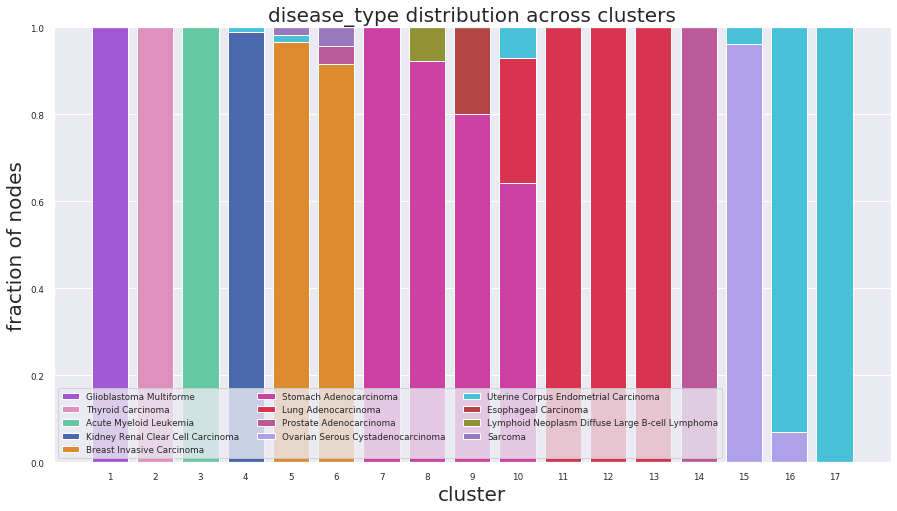

must shuffle files
True disease_type 1


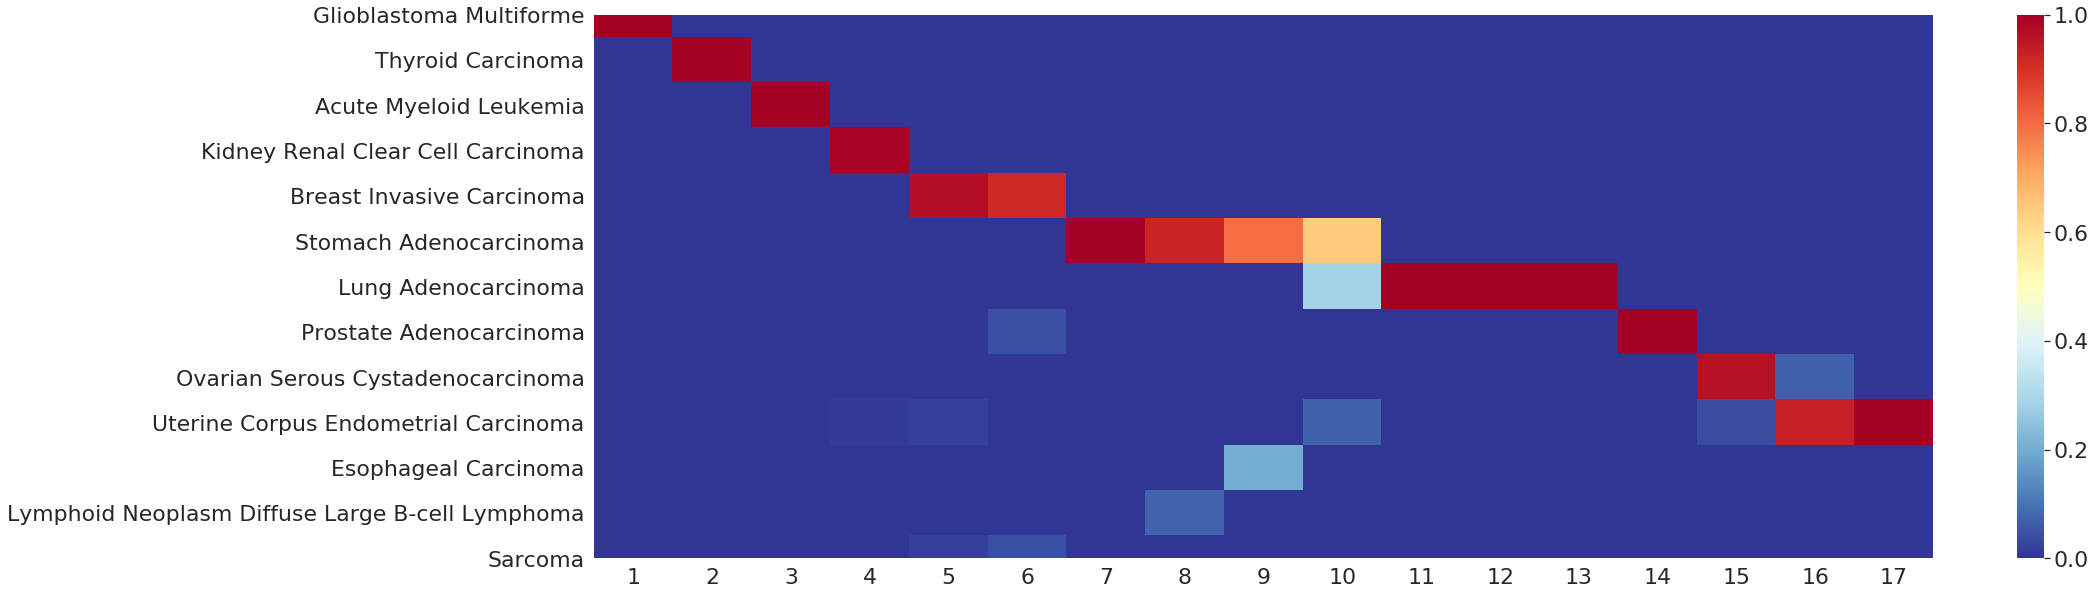

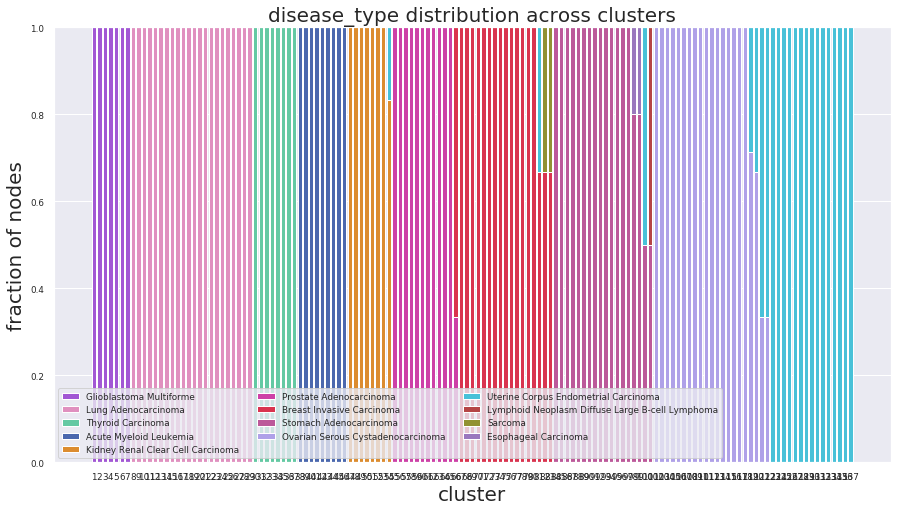

must shuffle files
True disease_type 0


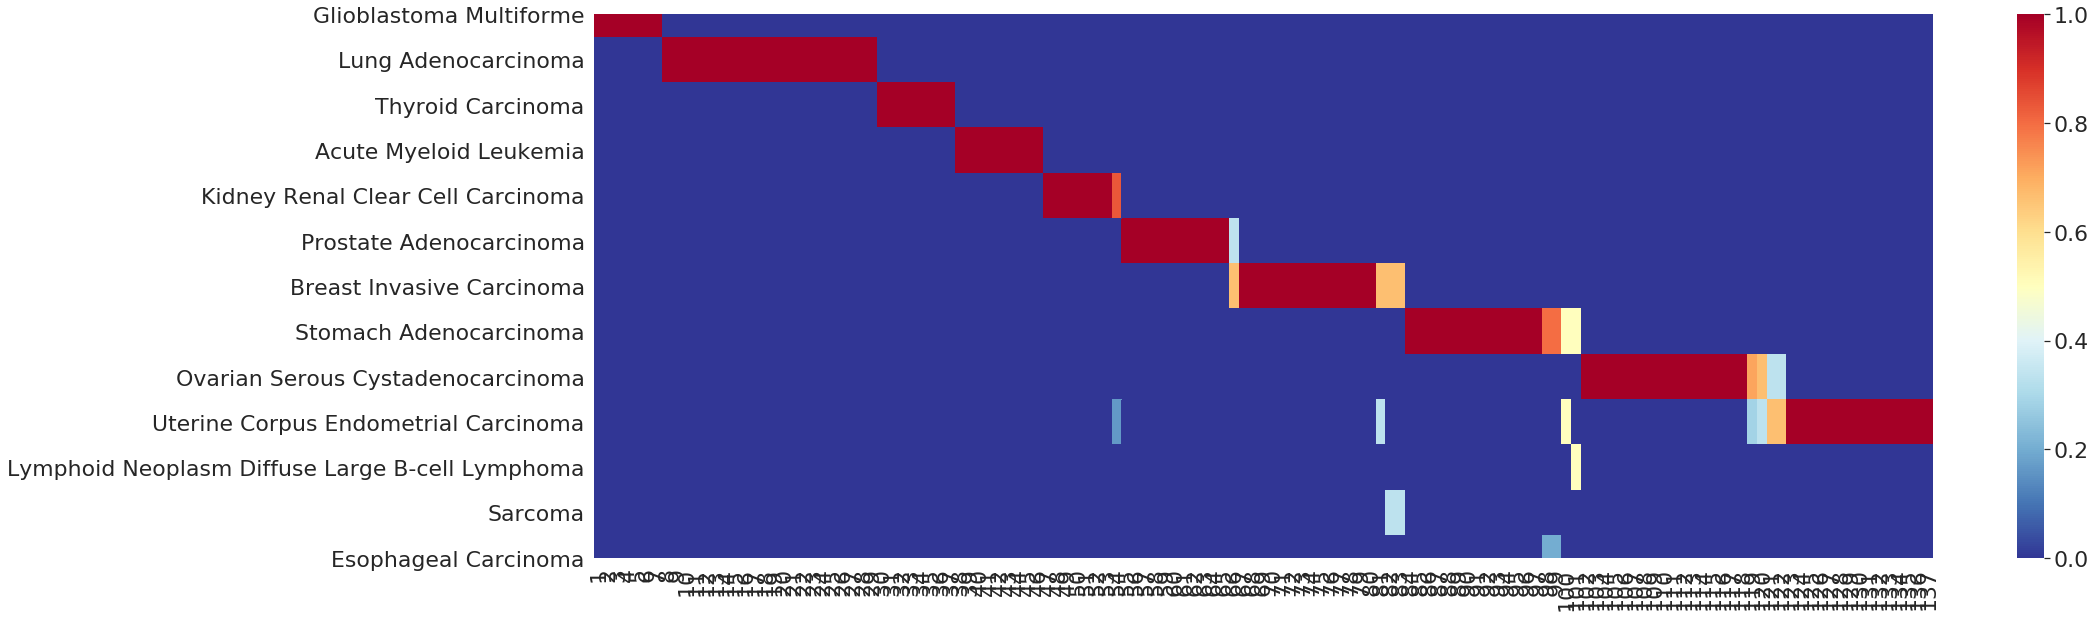

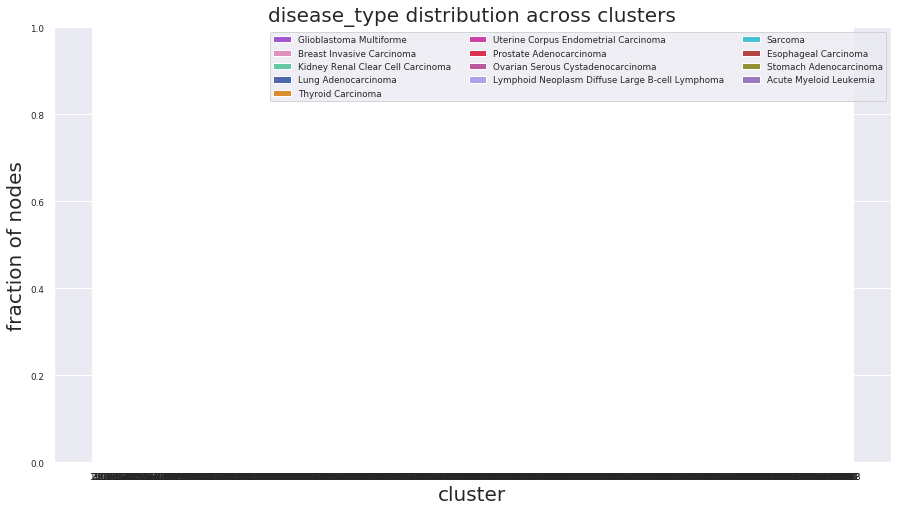

must shuffle files
True primary_site 3


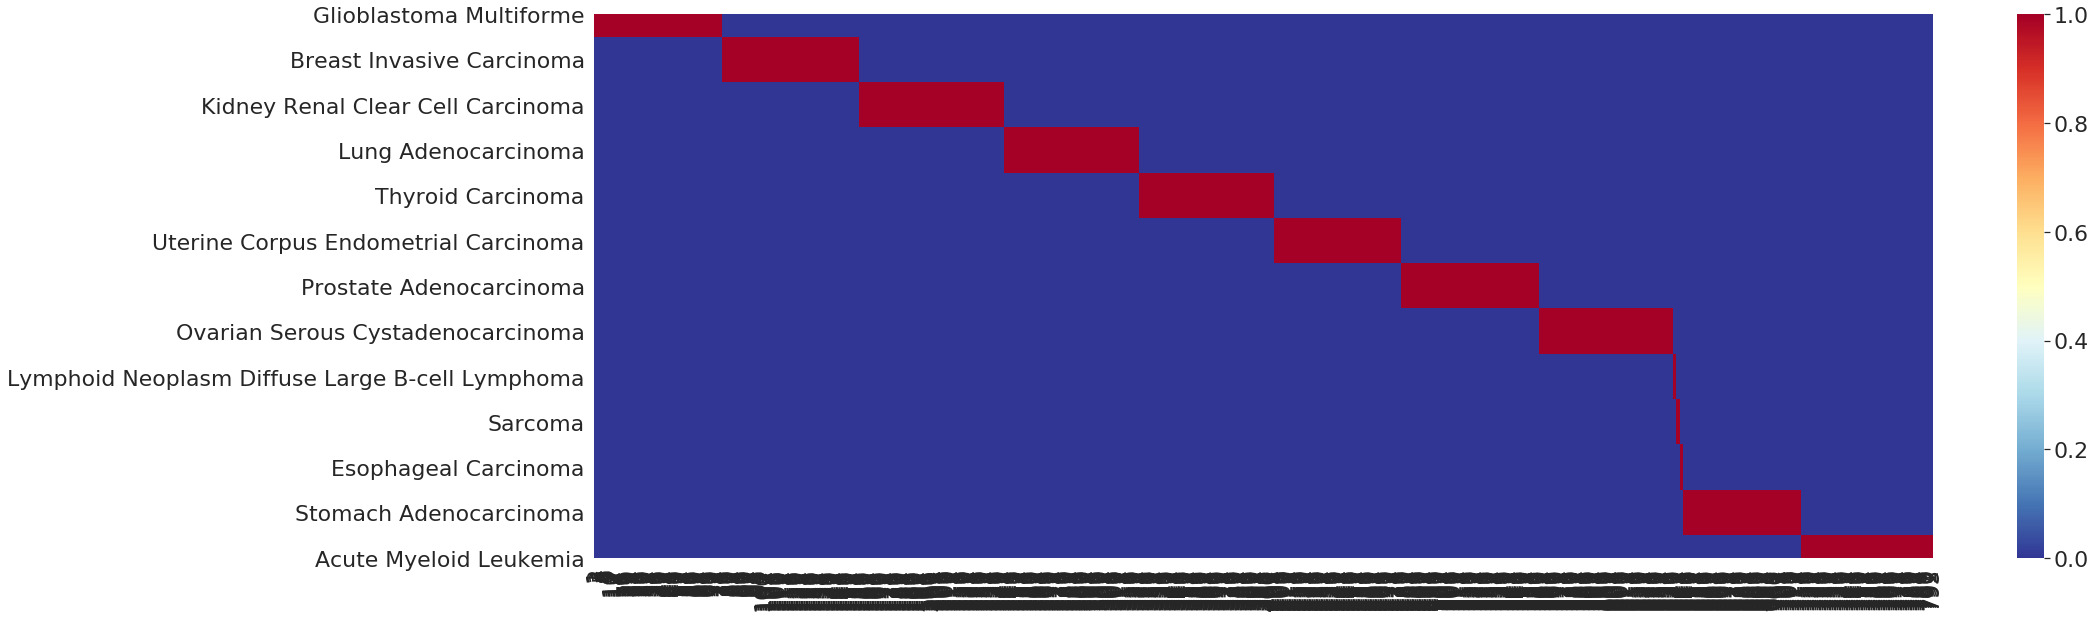

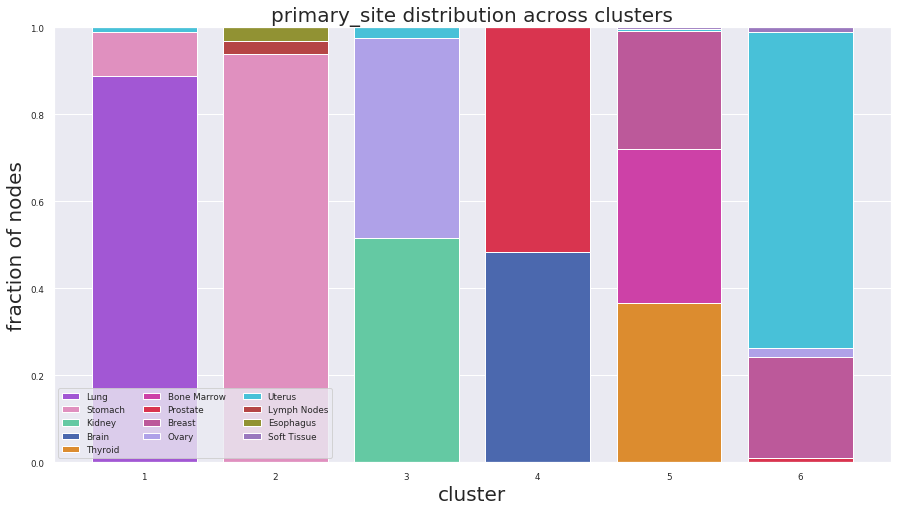

must shuffle files
True primary_site 2


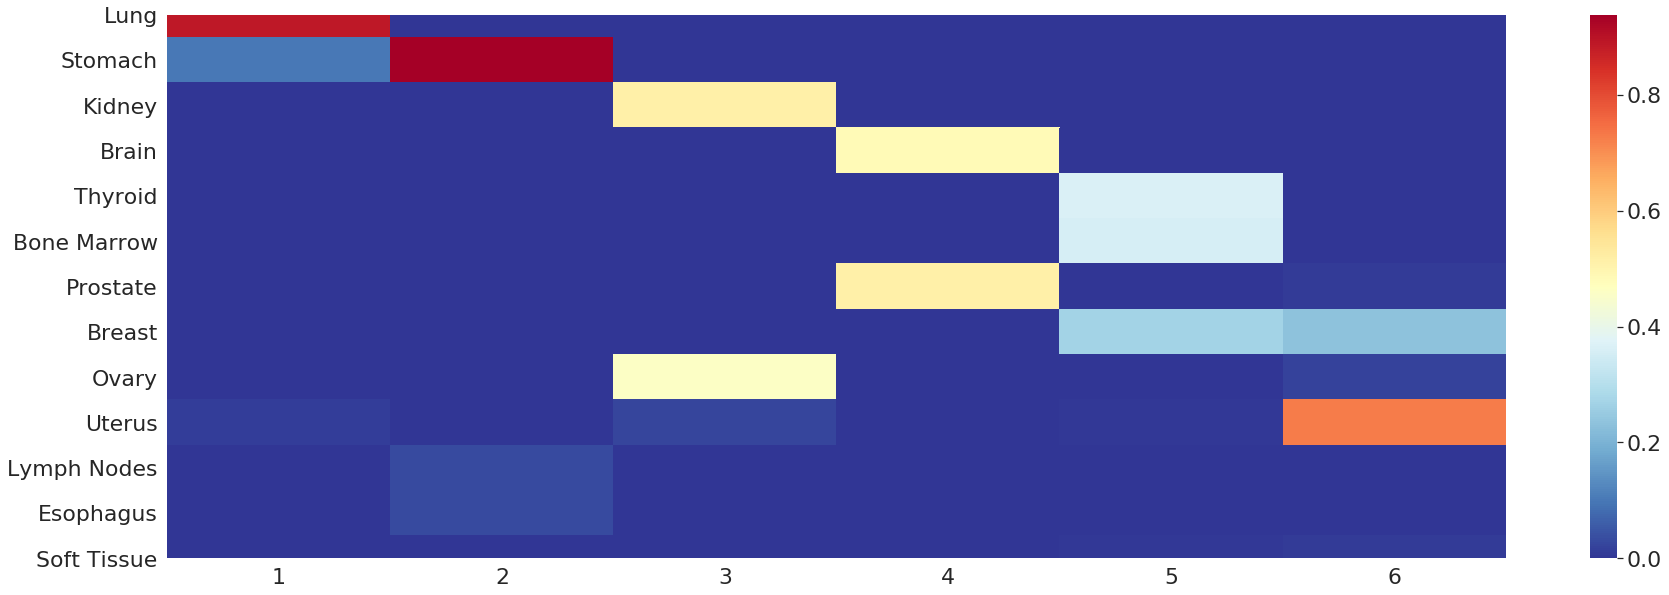

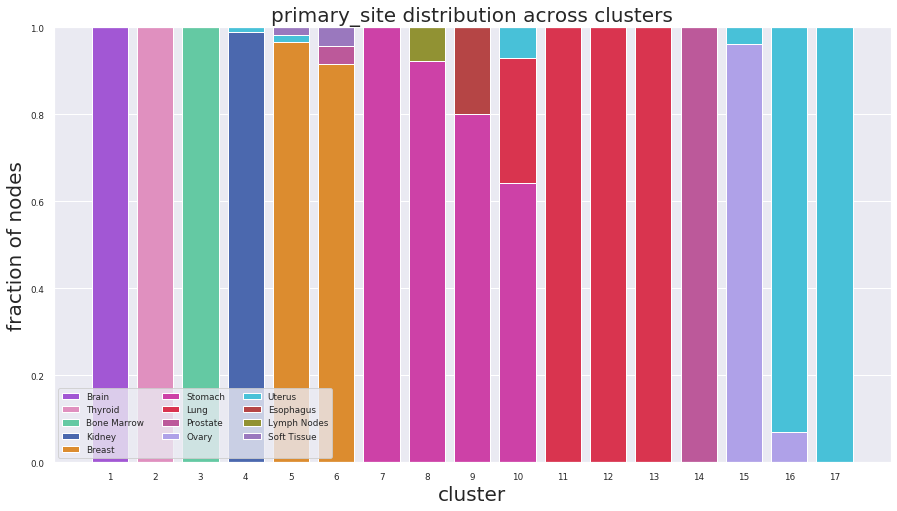

must shuffle files
True primary_site 1


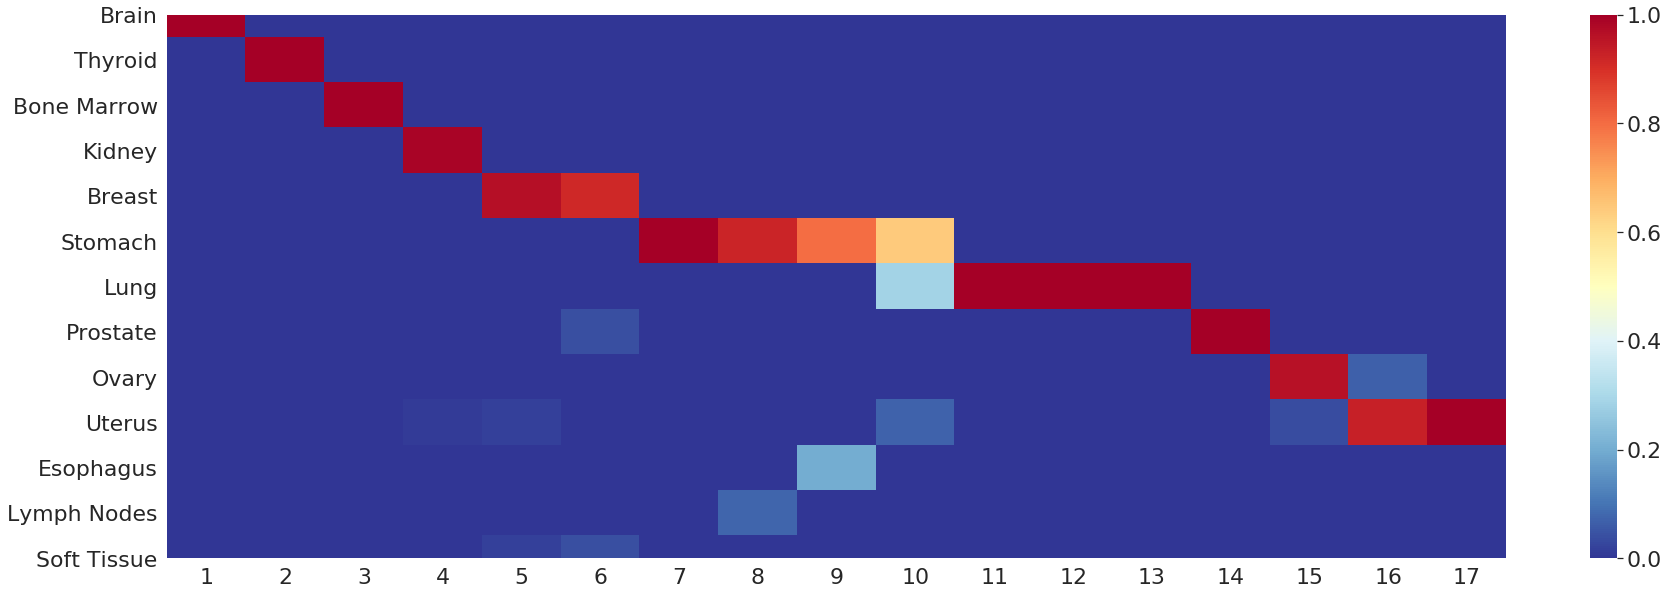

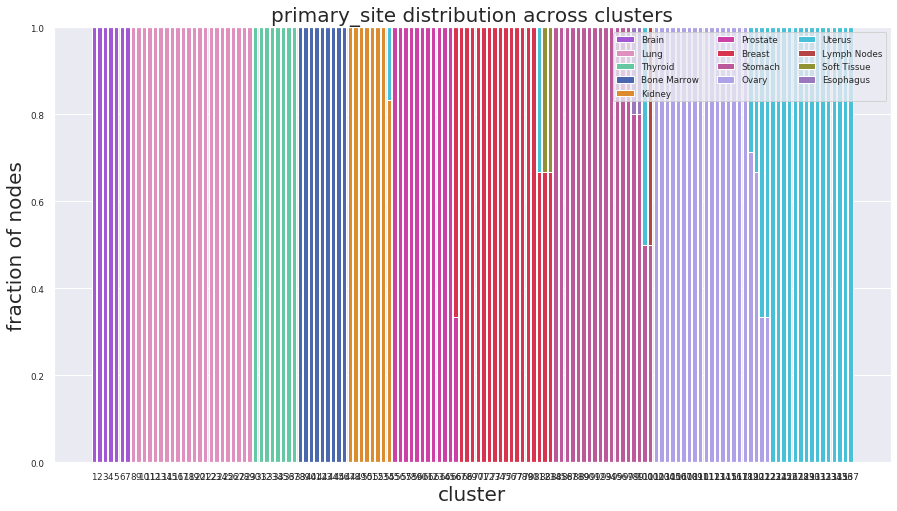

must shuffle files
True primary_site 0


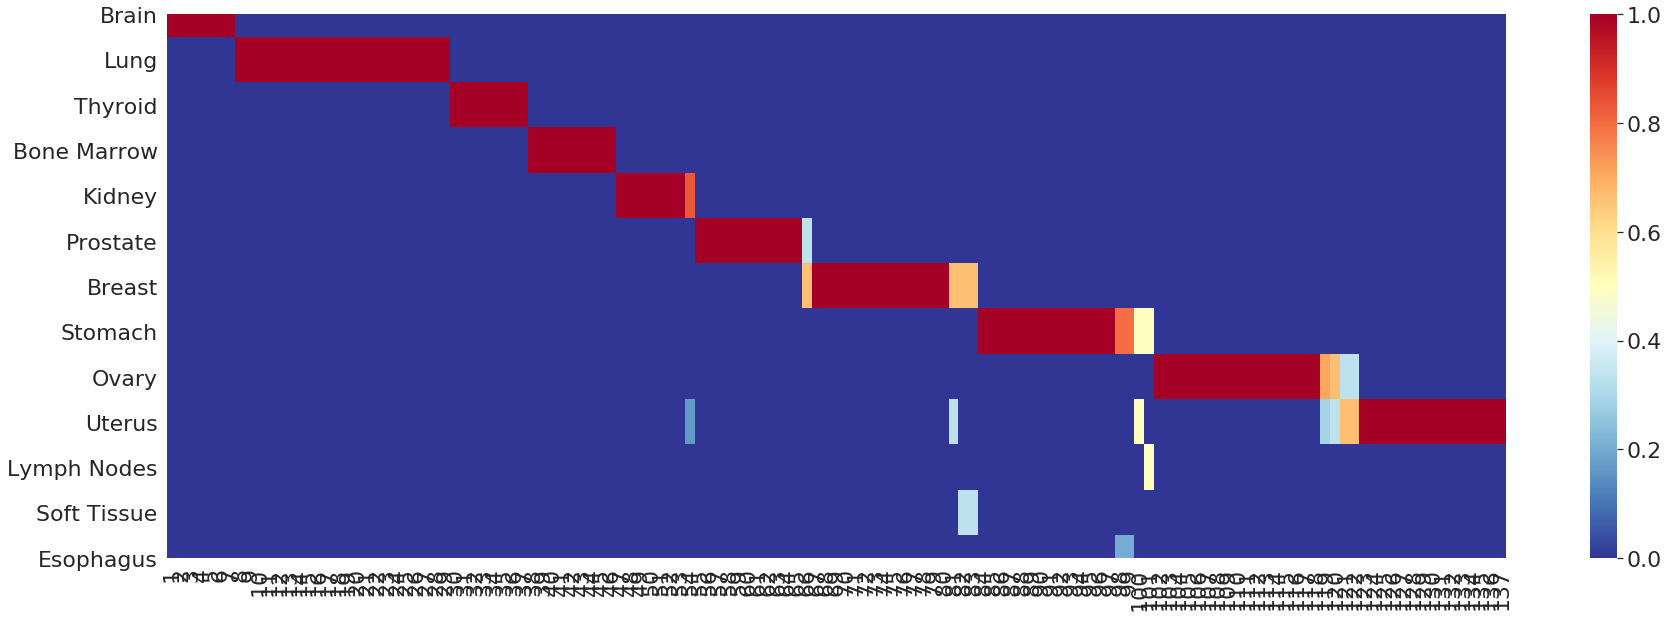

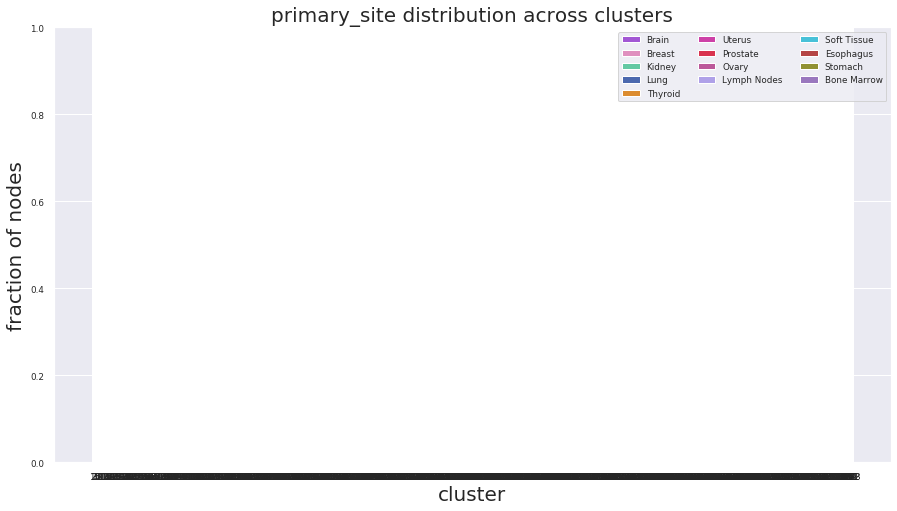

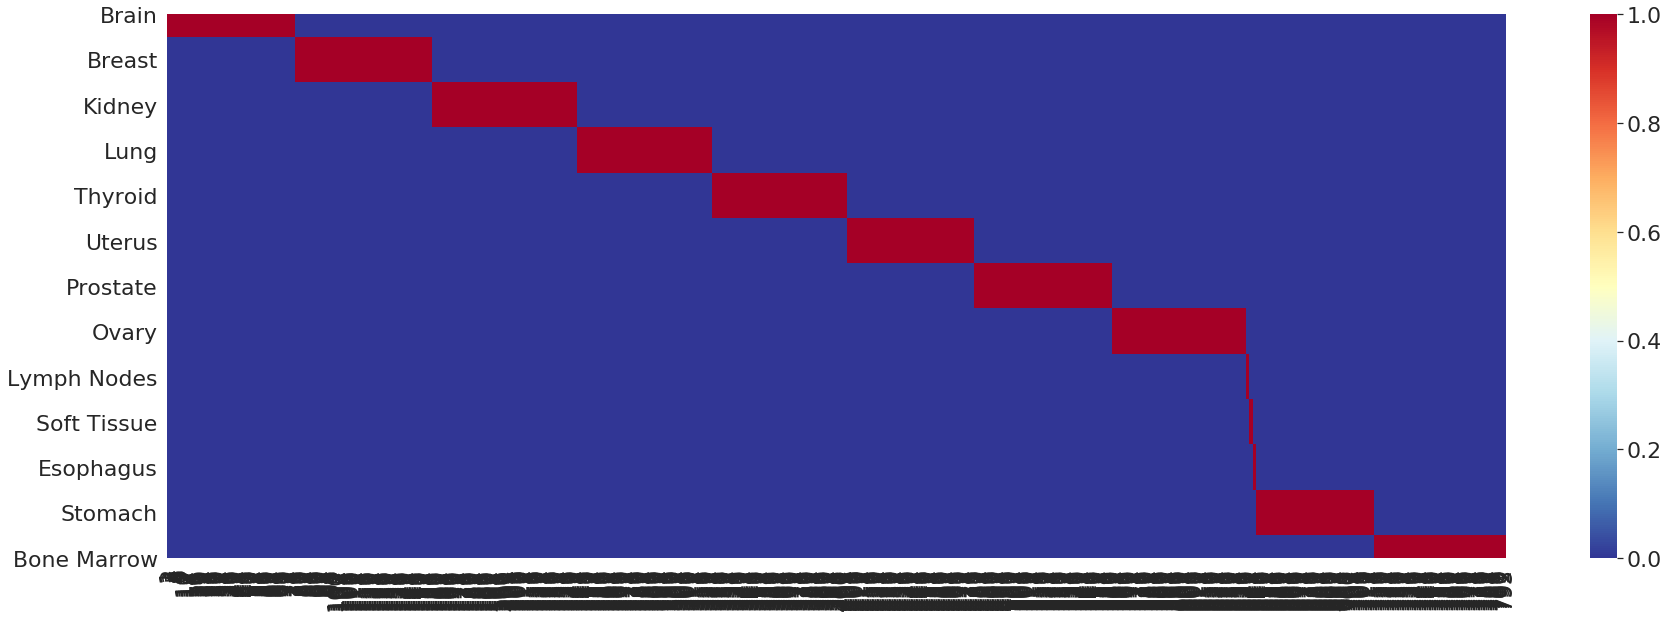

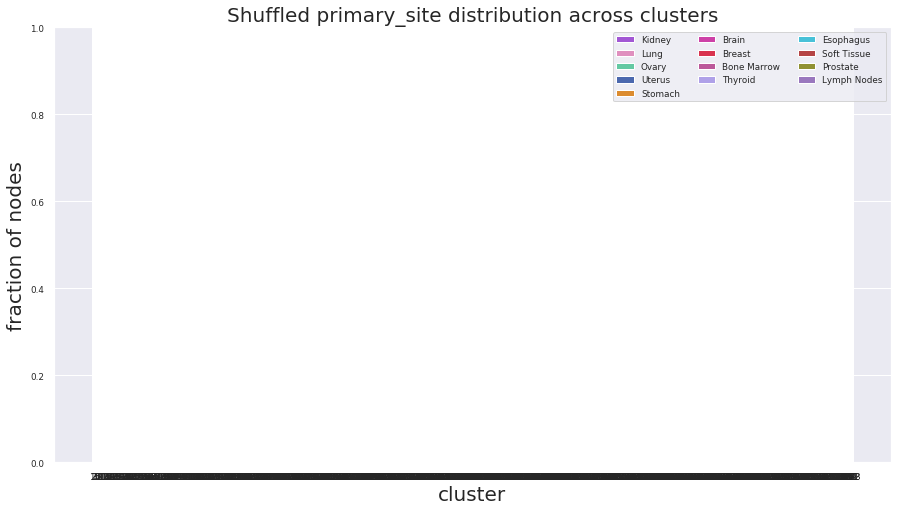

False disease_type 3


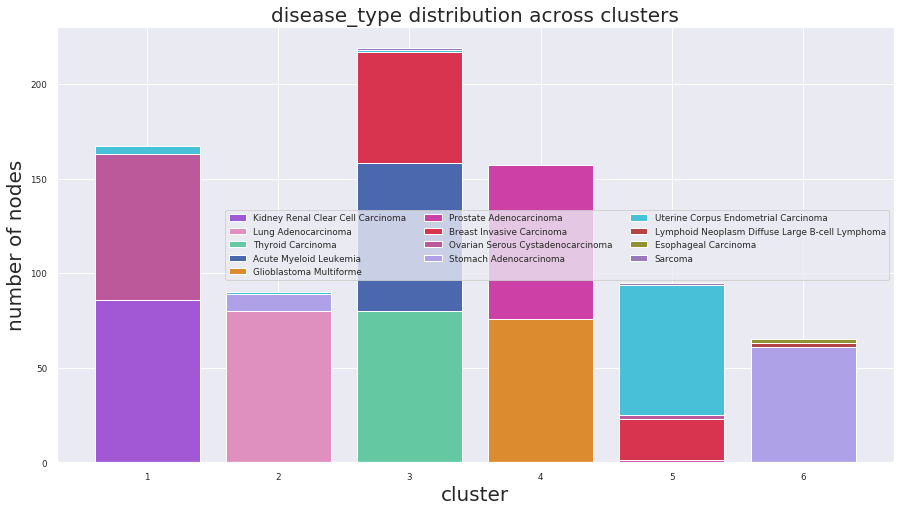

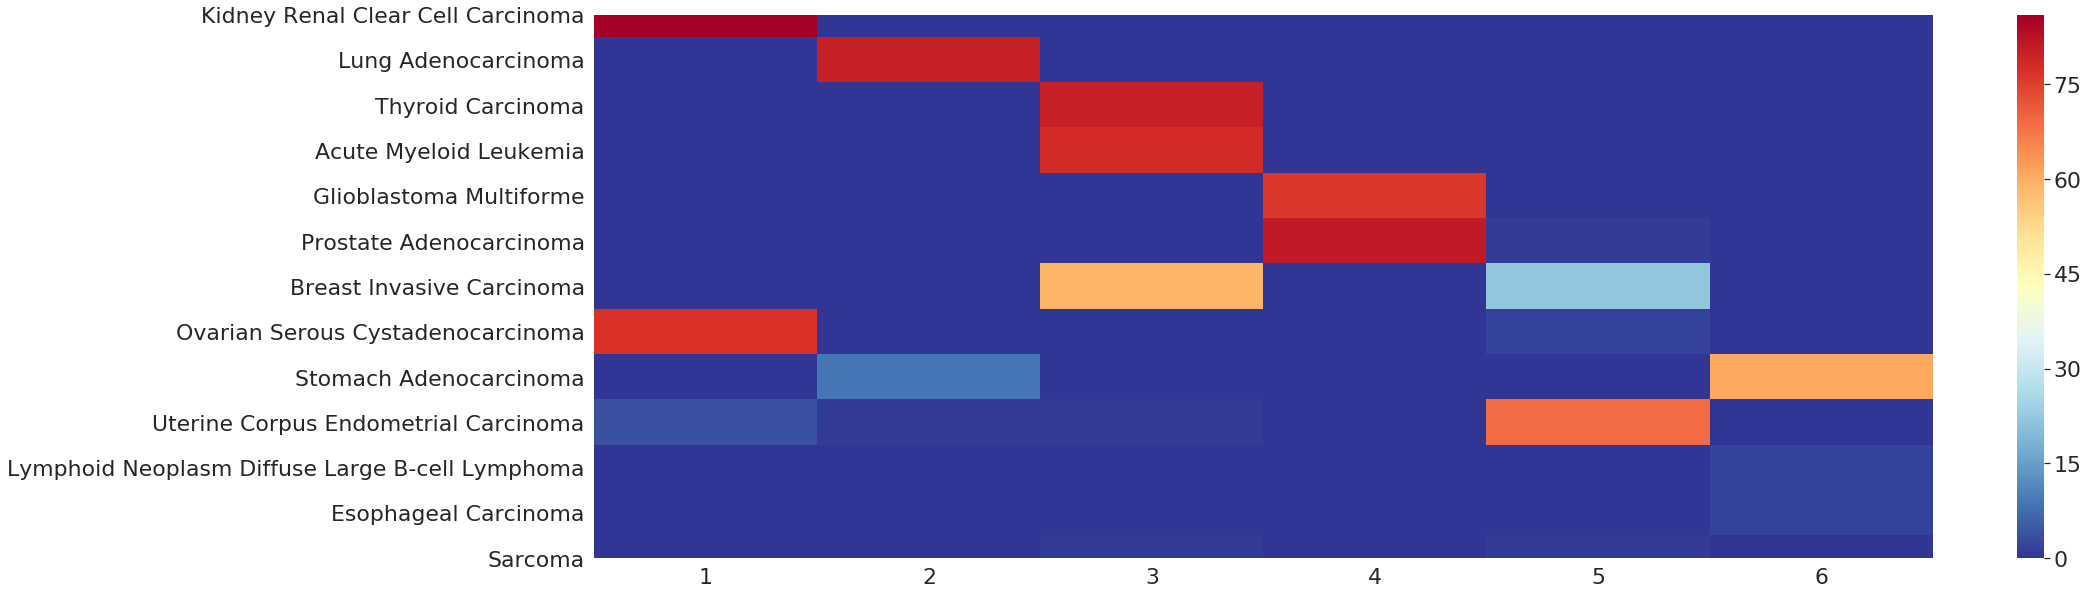

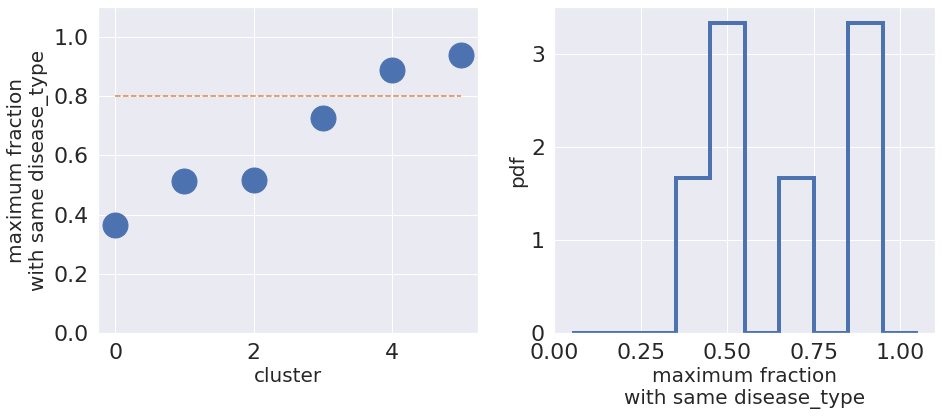

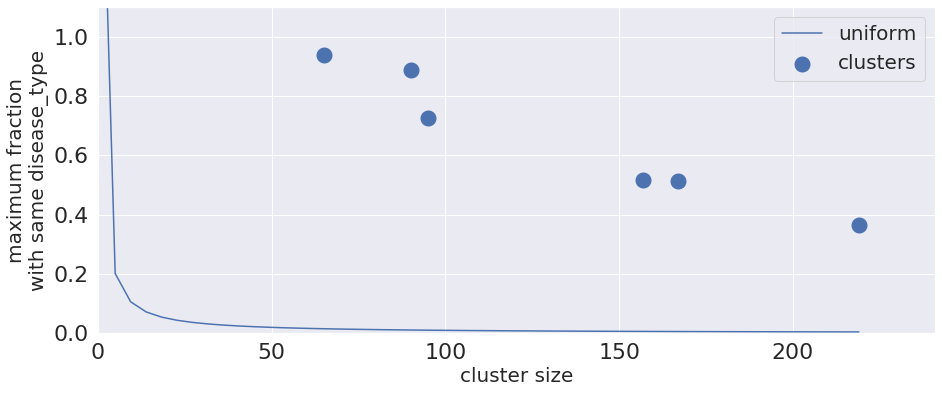

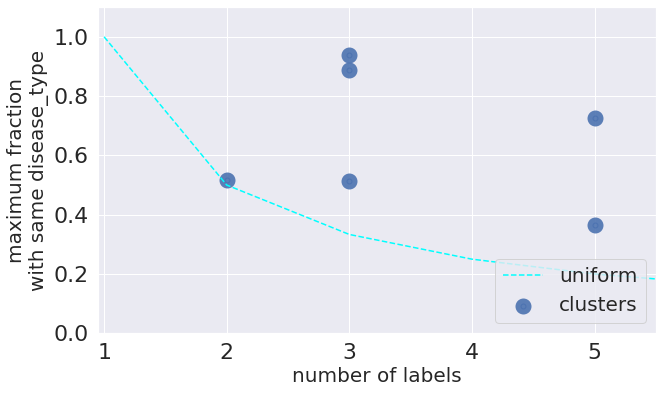

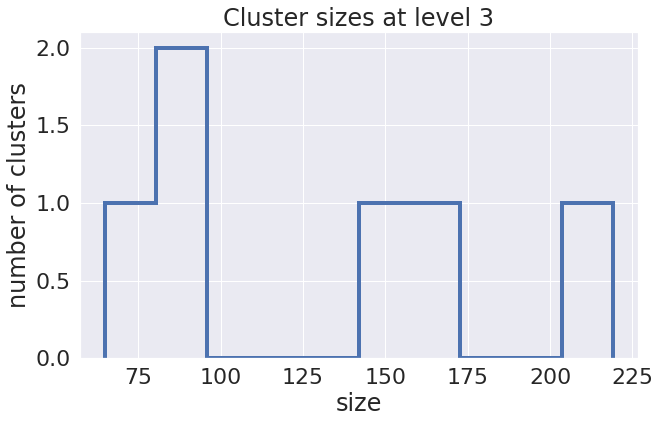

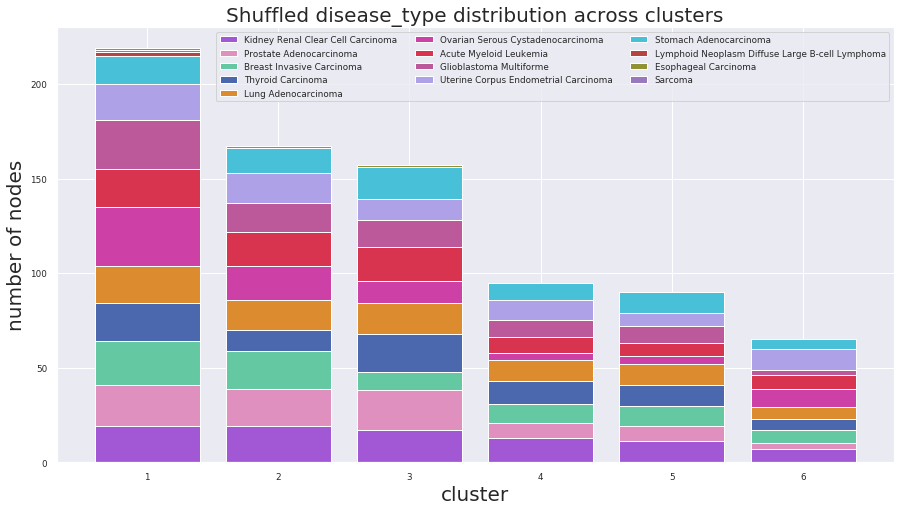

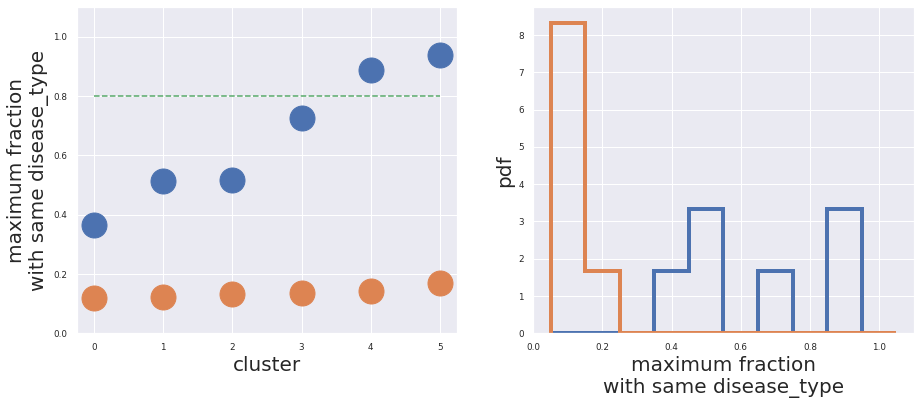

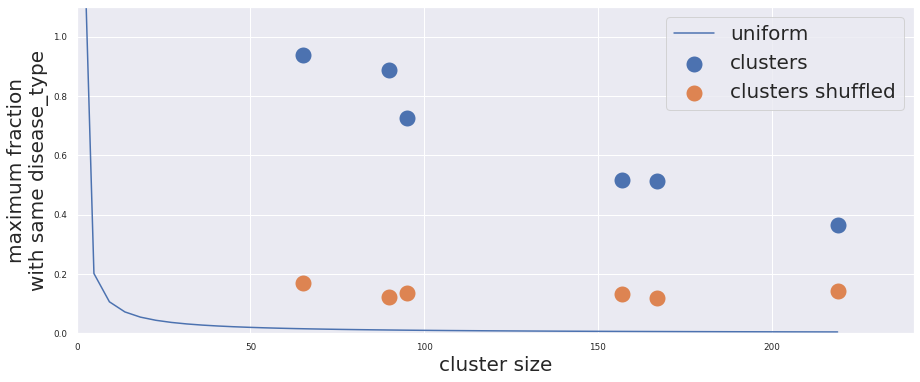

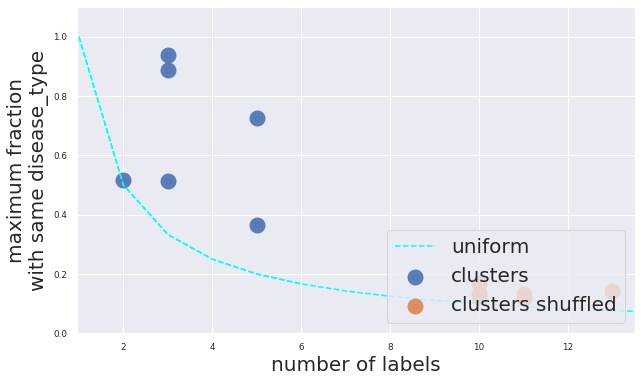

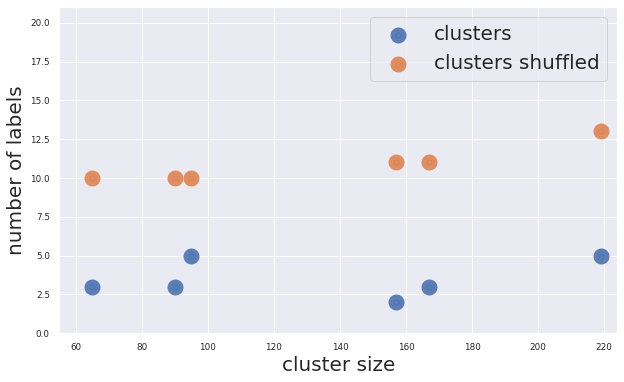

False disease_type 2


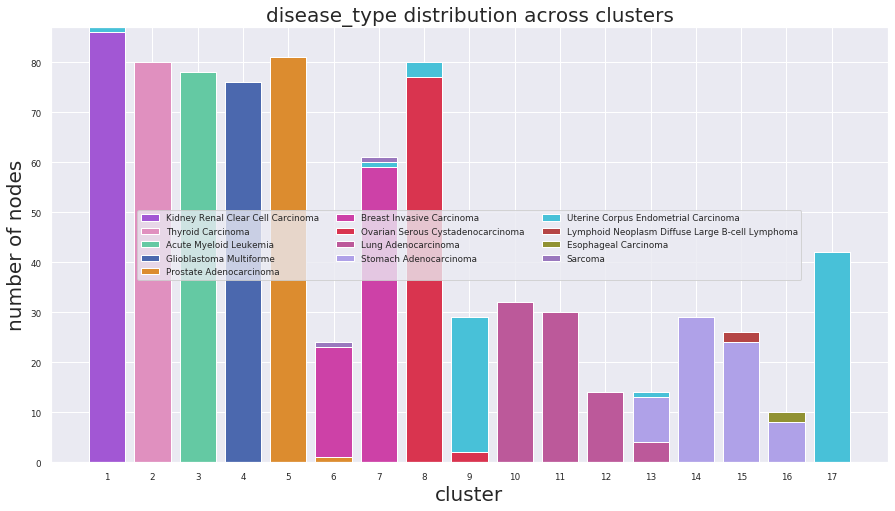

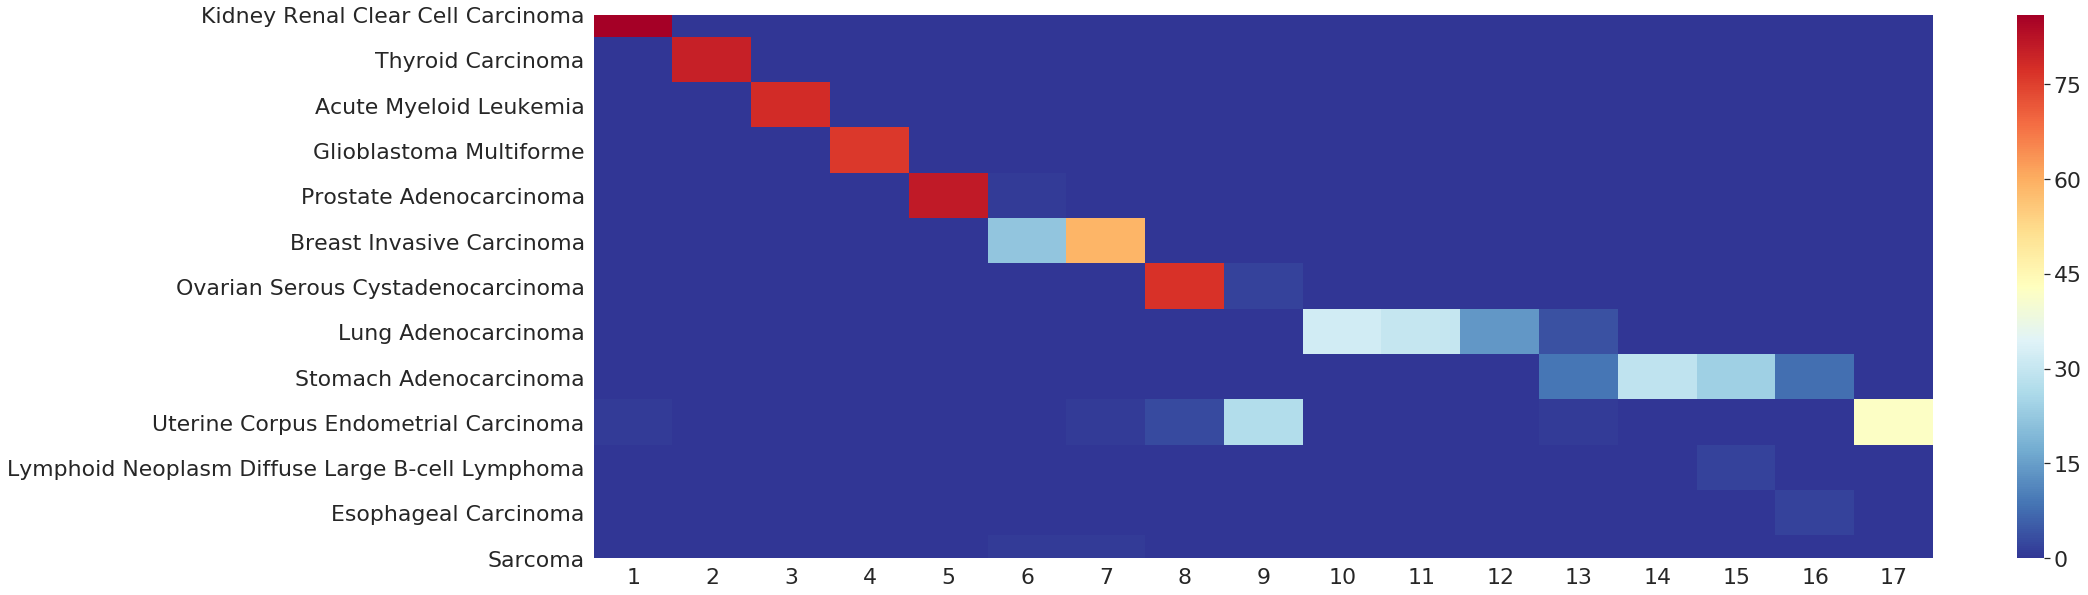

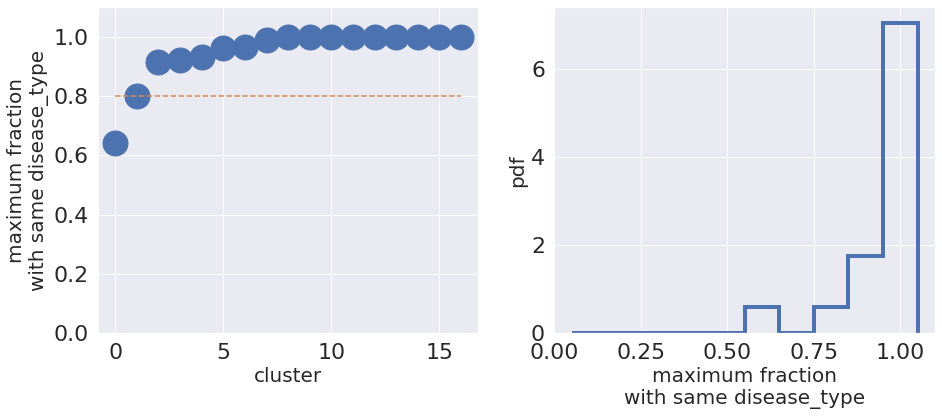

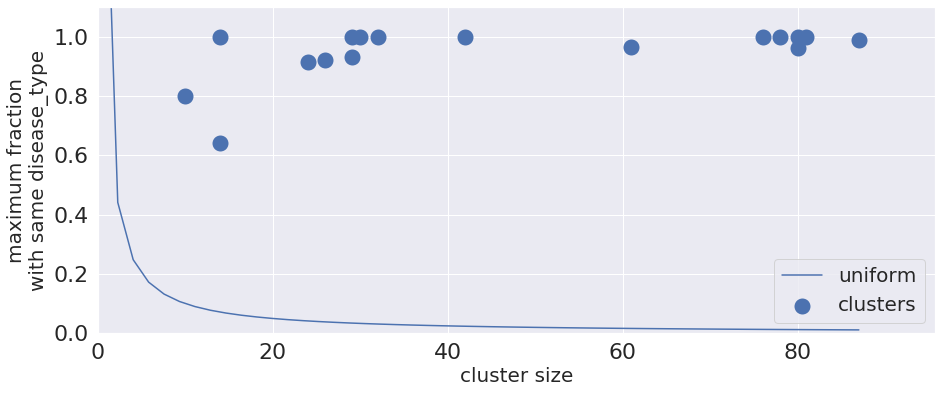

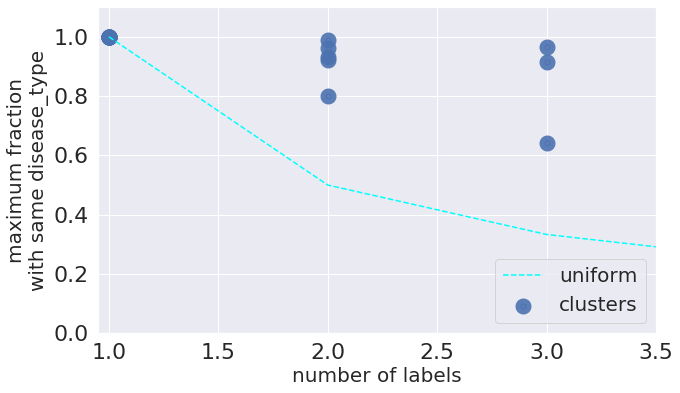

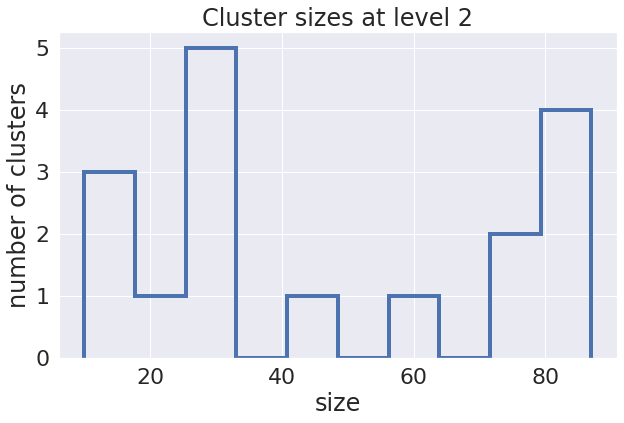

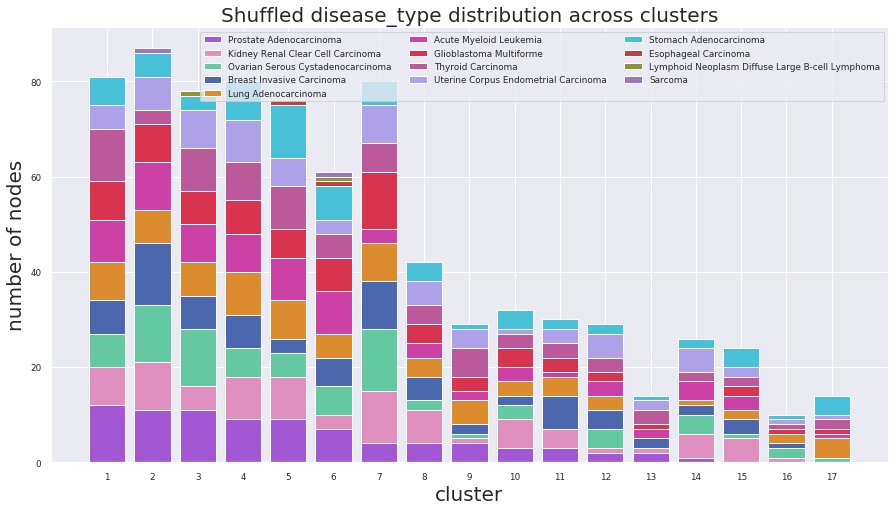

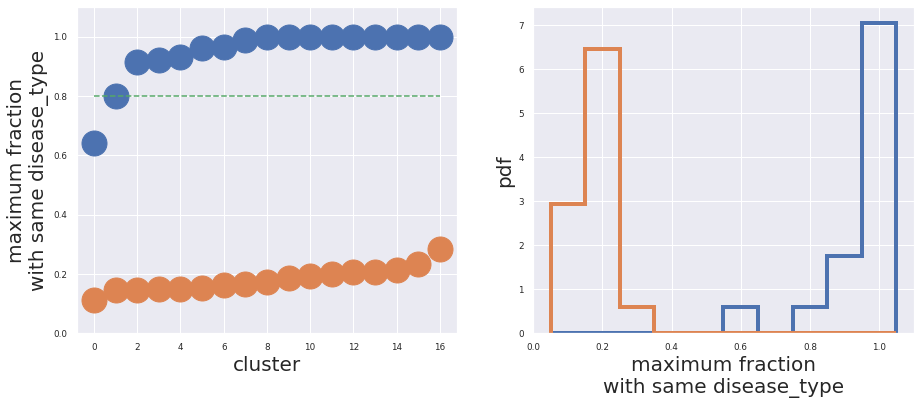

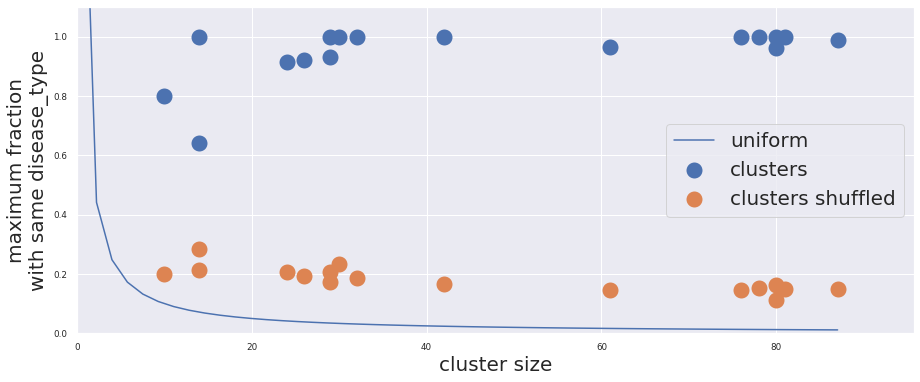

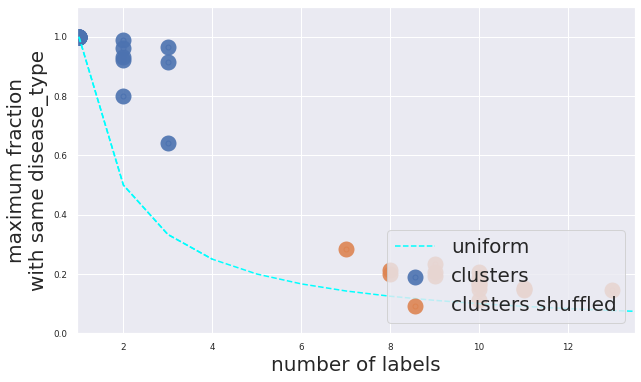

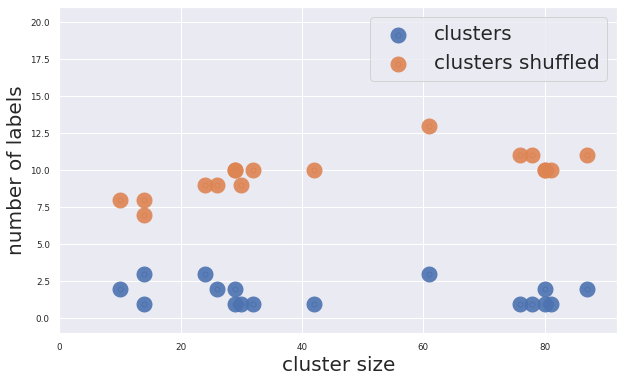

False disease_type 1


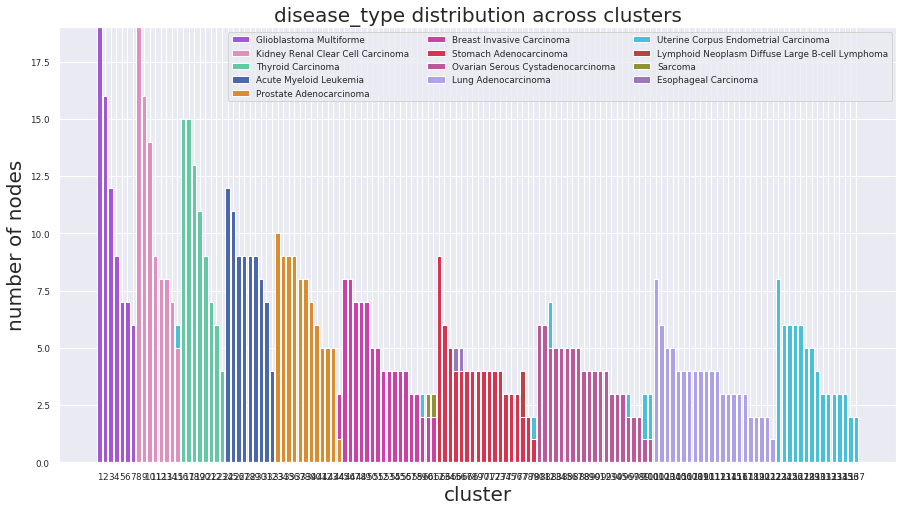

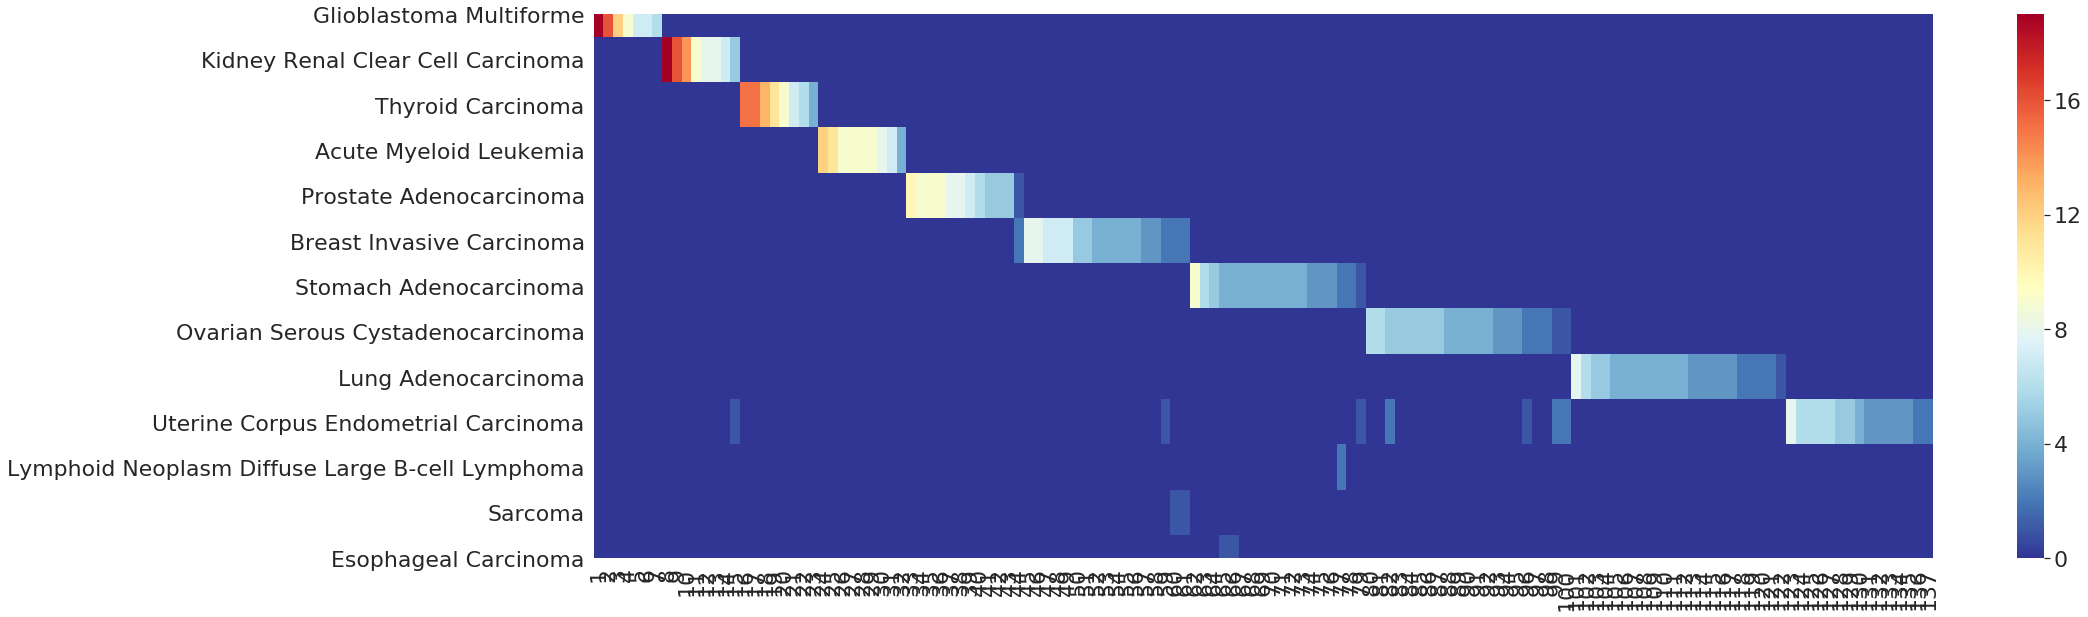

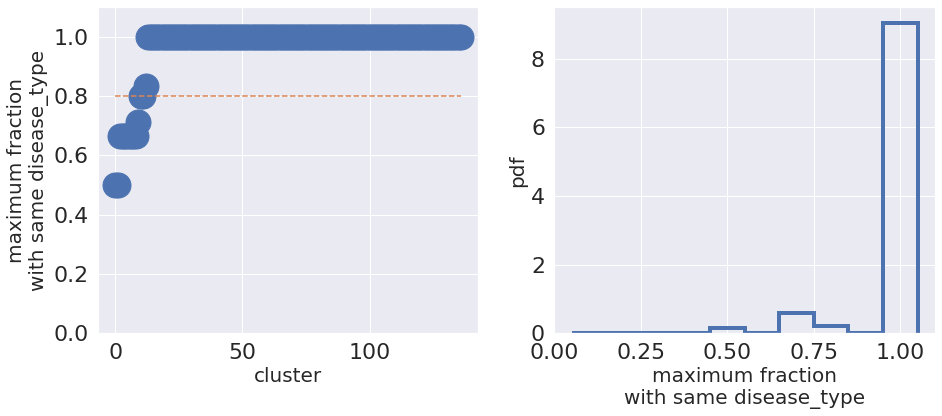

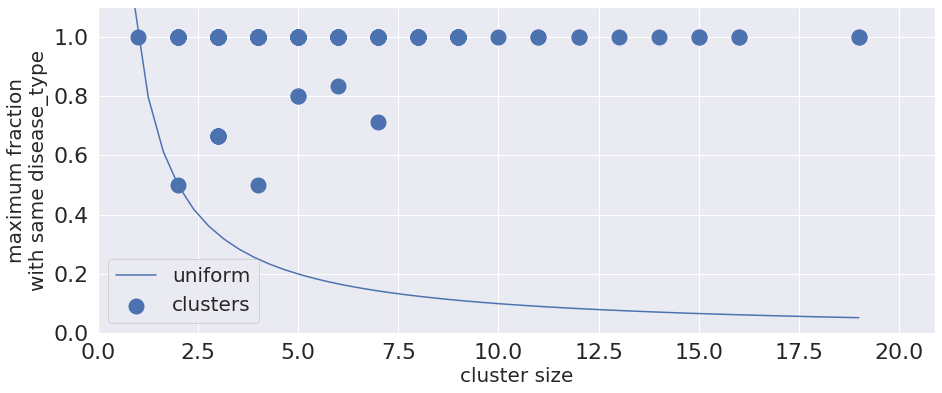

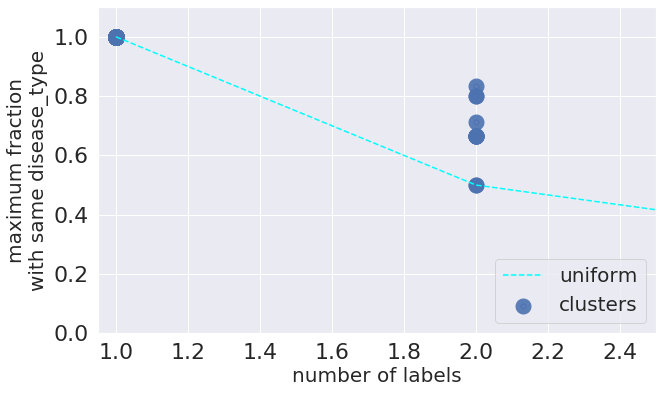

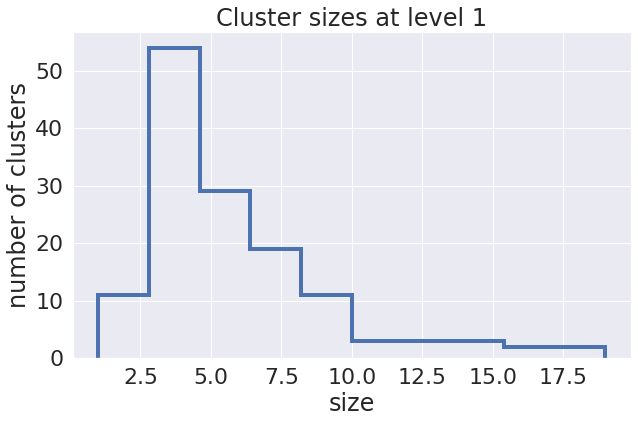

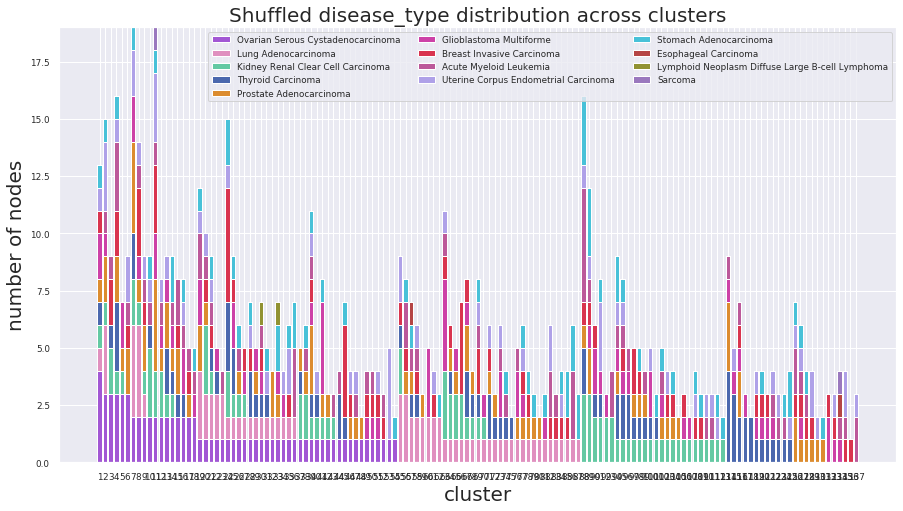

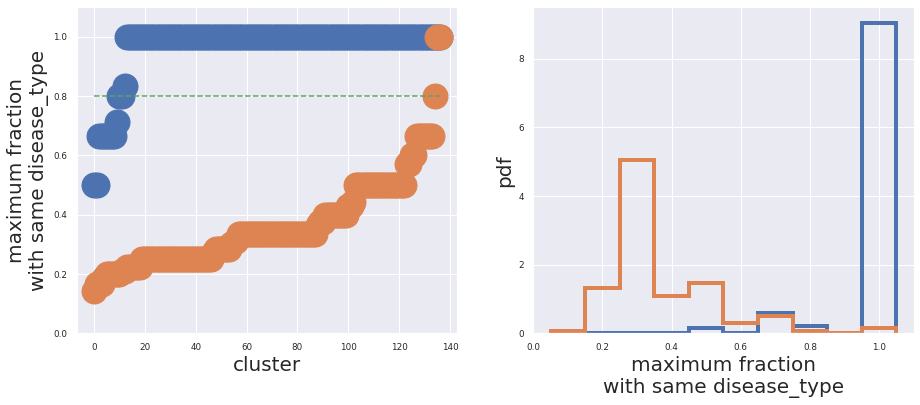

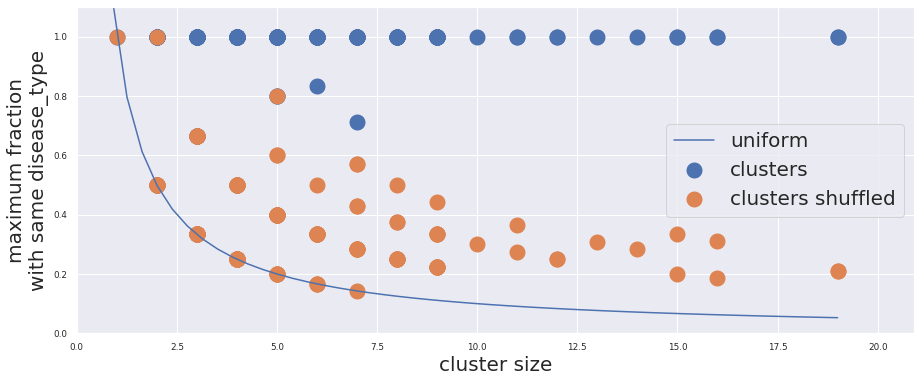

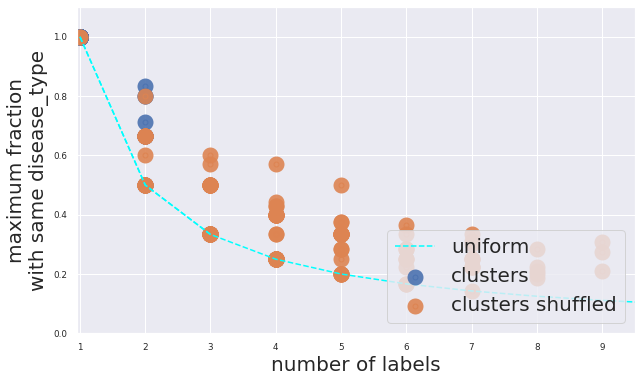

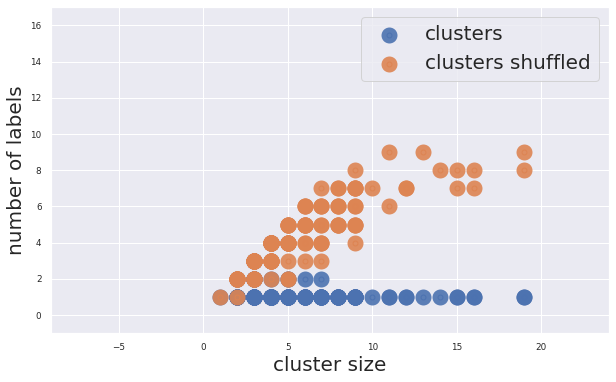

False disease_type 0


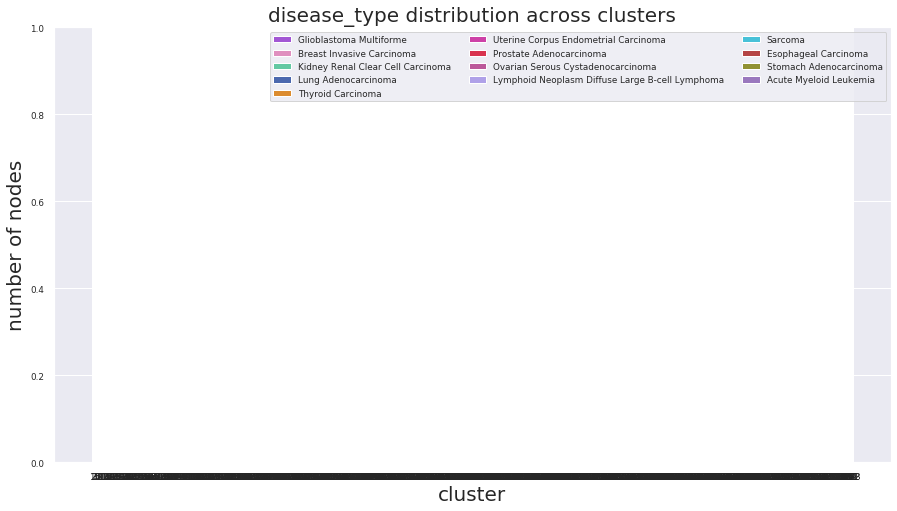

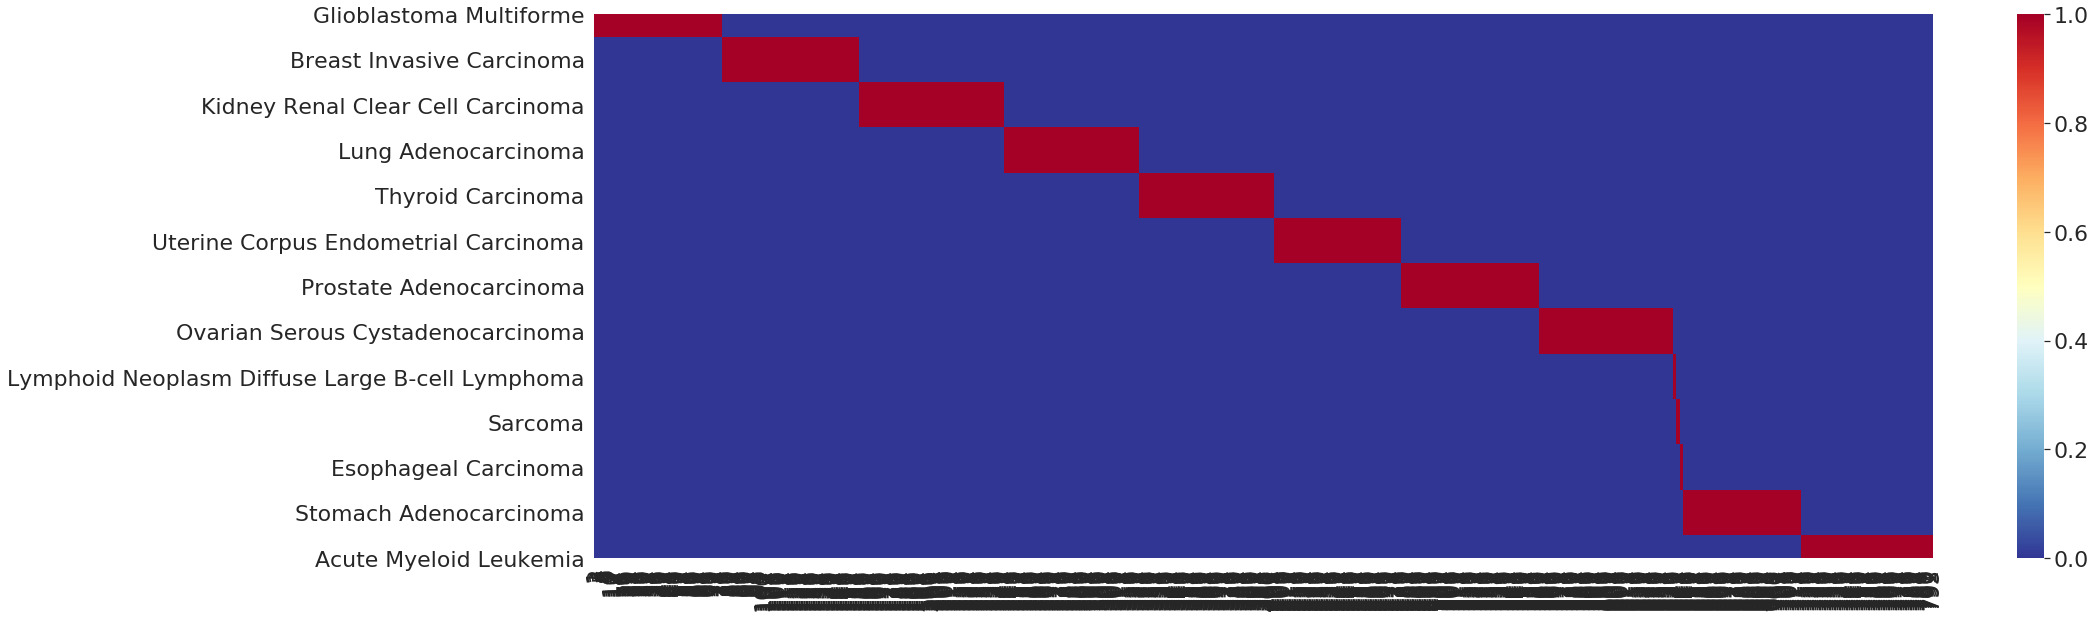

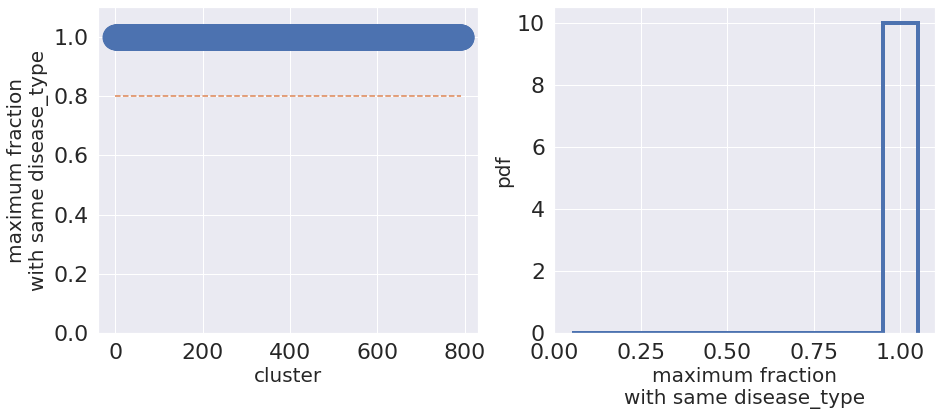

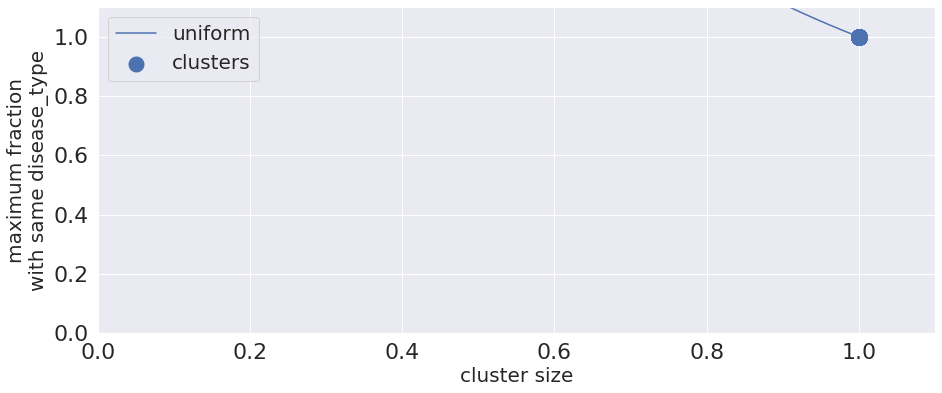

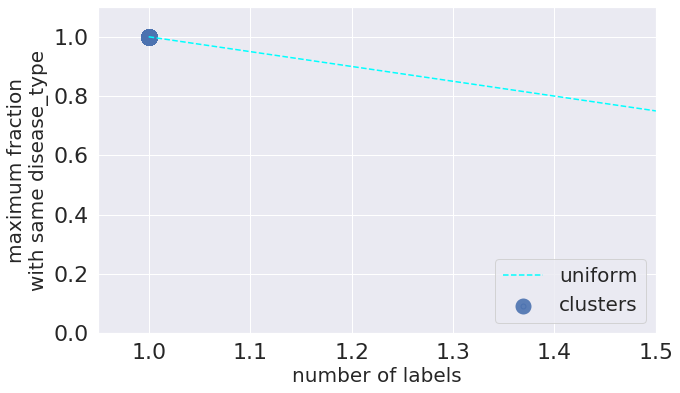

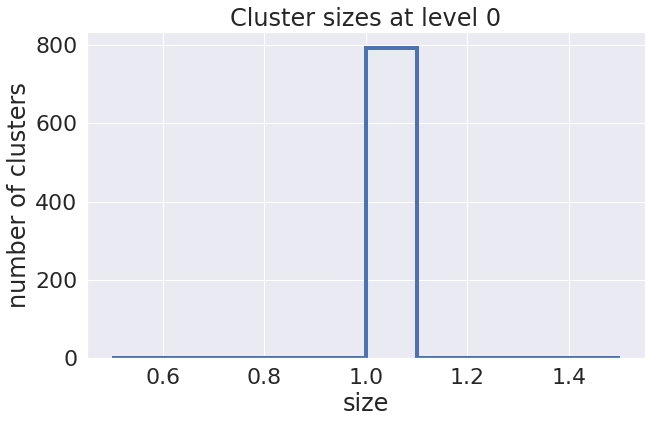

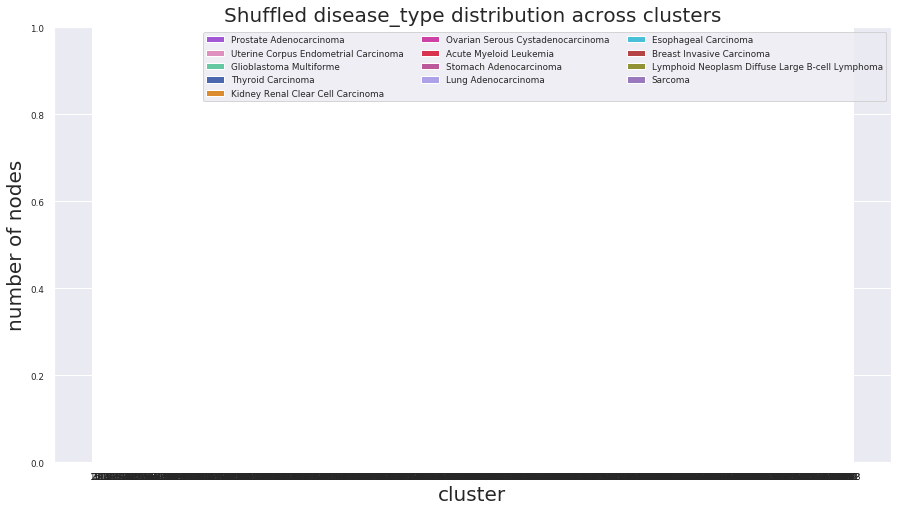

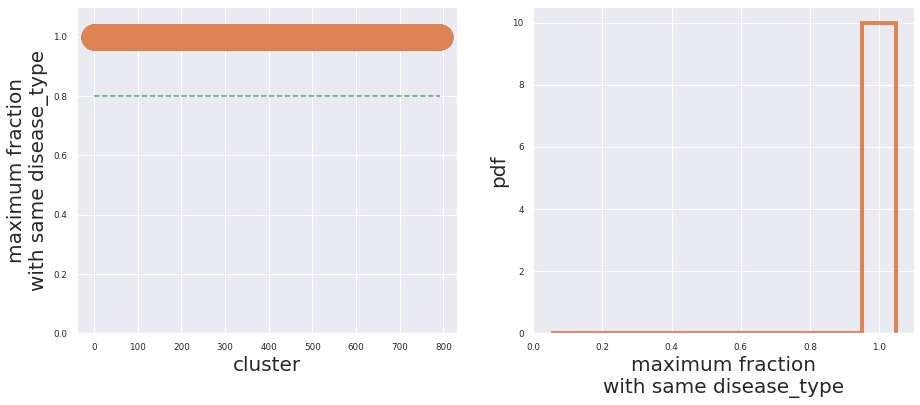

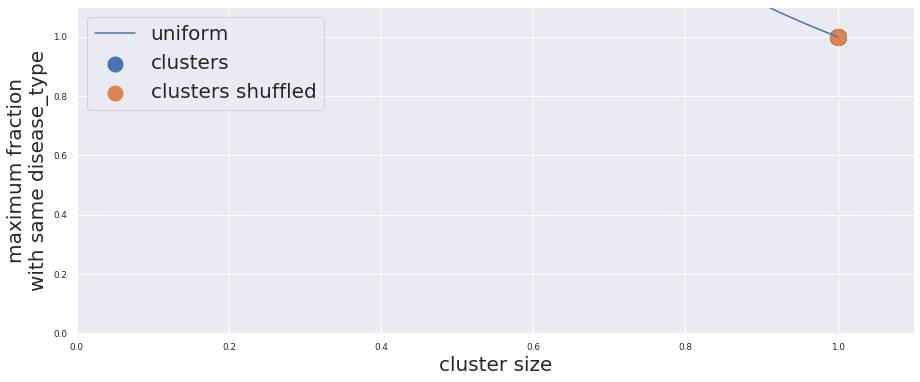

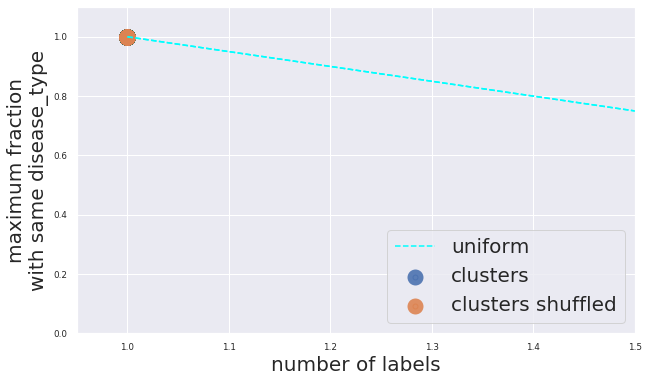

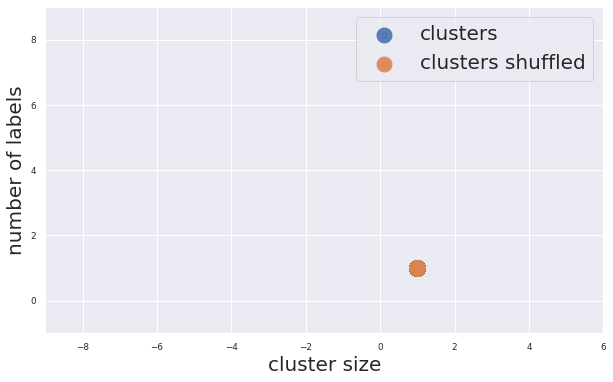

False primary_site 3


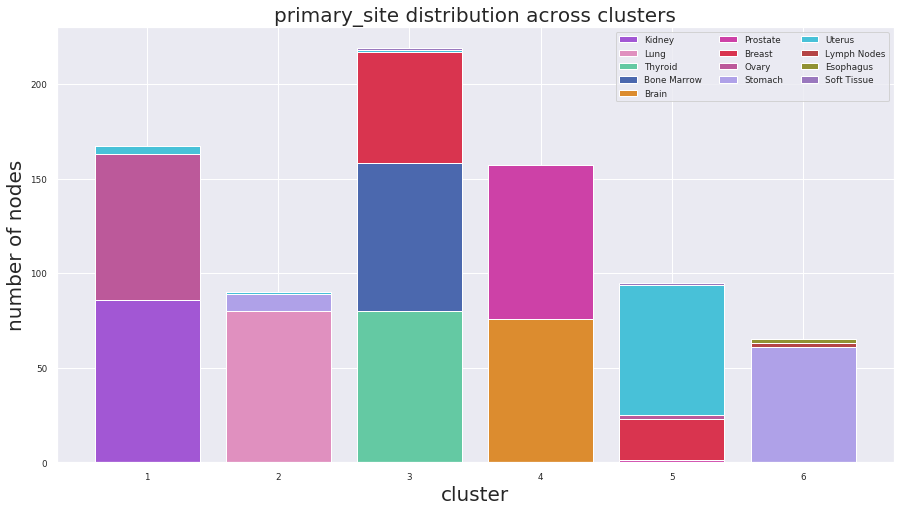

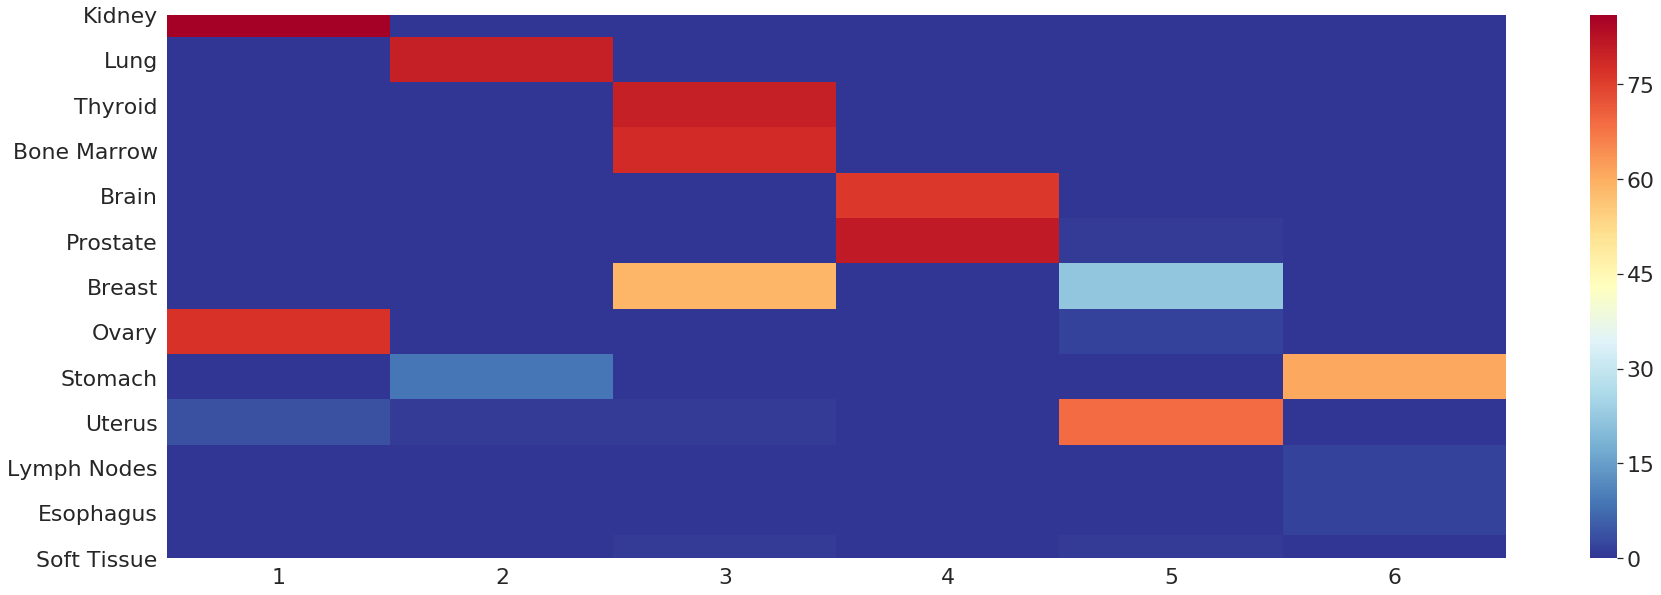

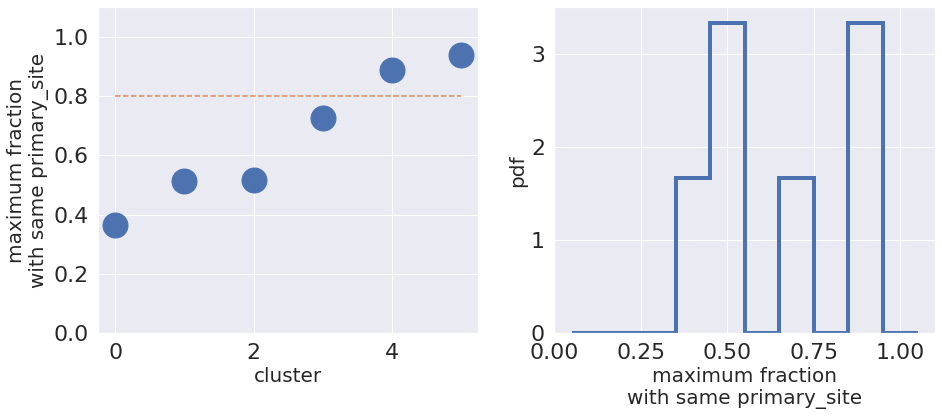

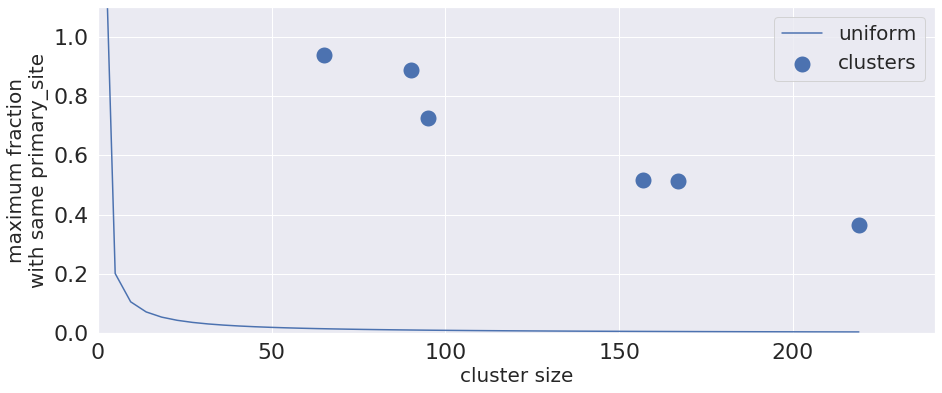

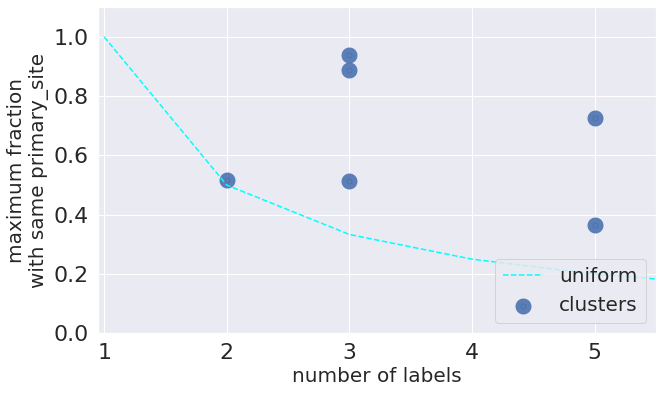

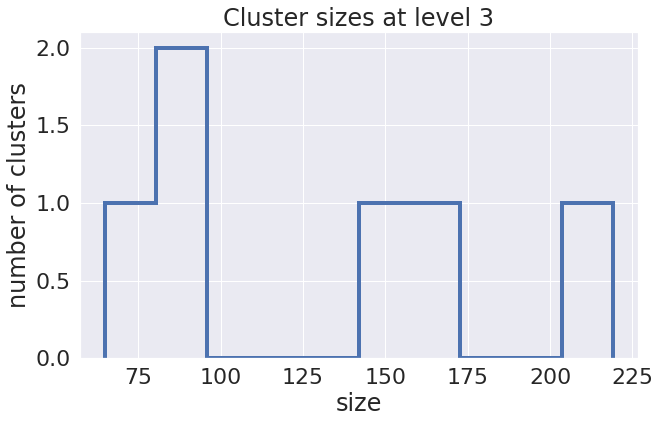

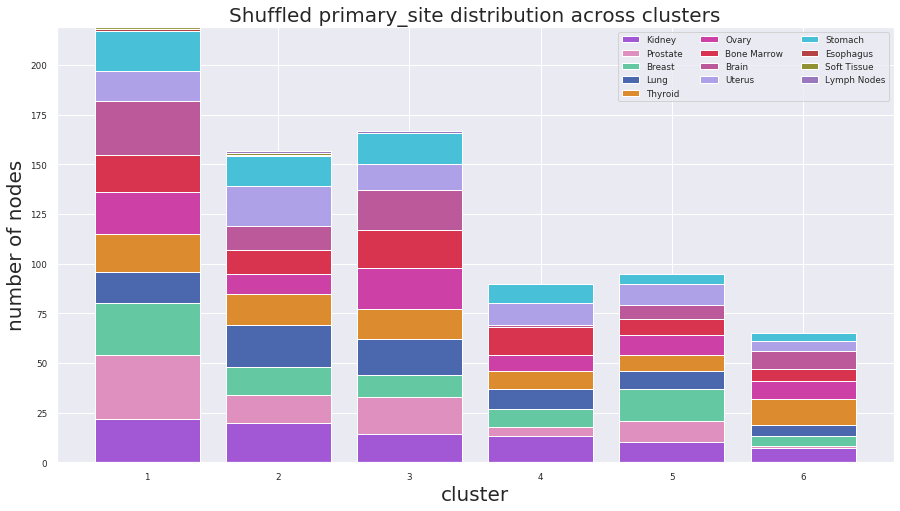

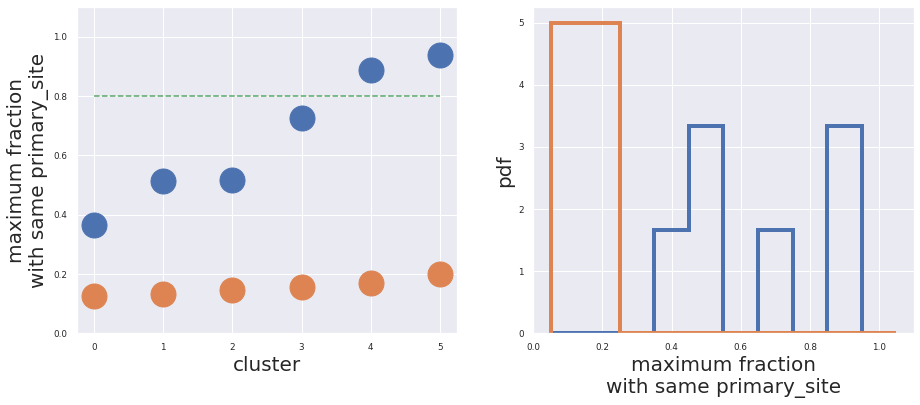

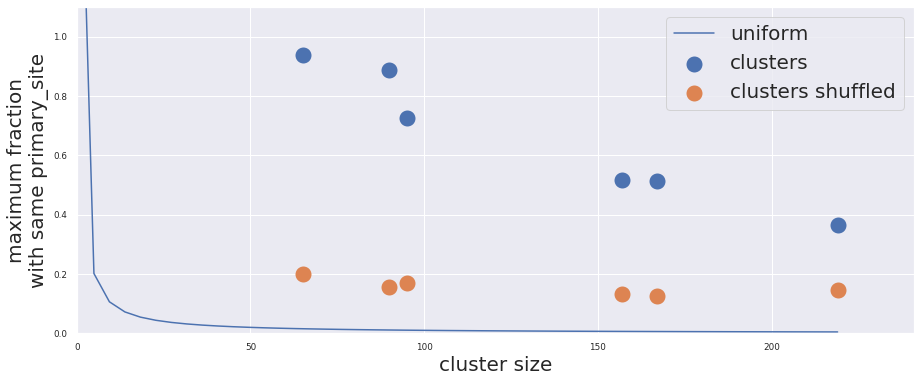

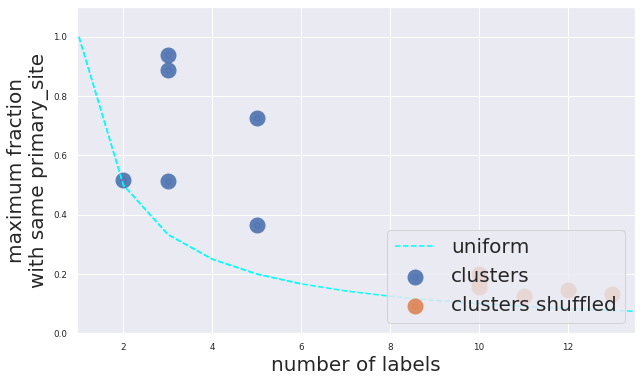

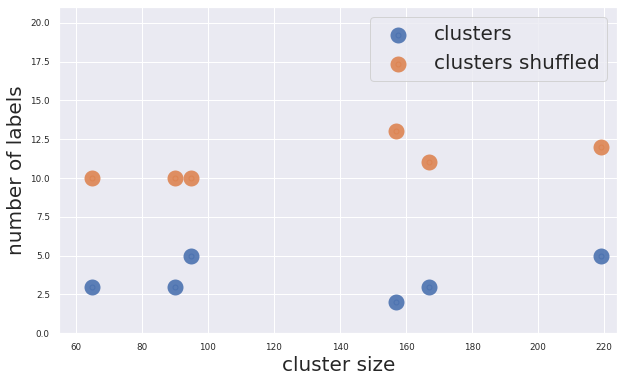

False primary_site 2


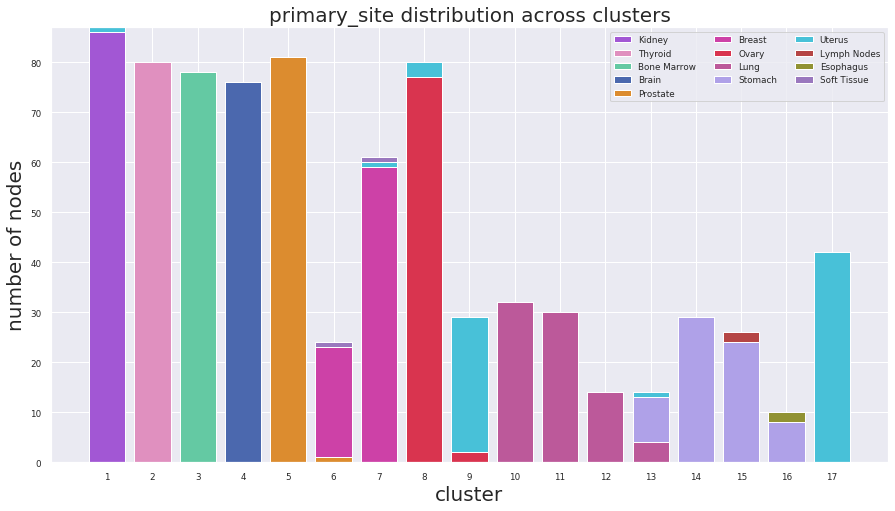

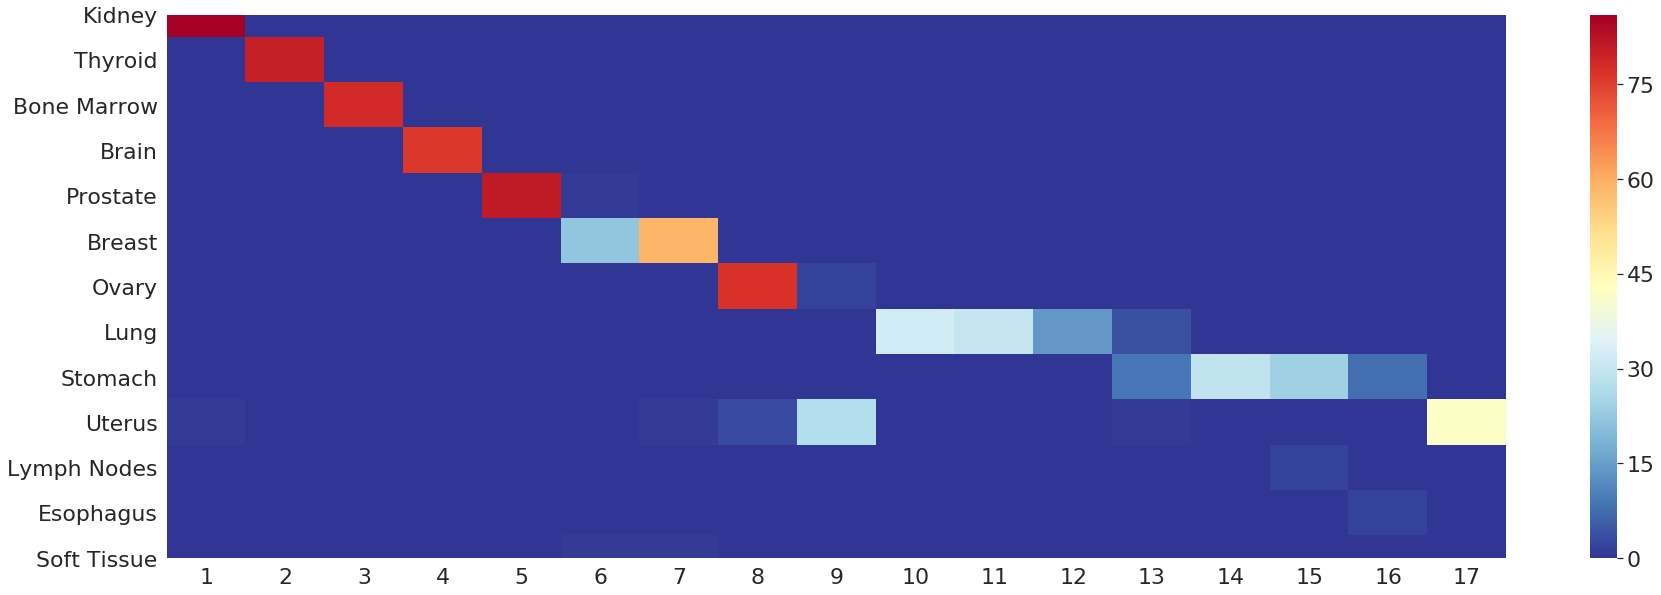

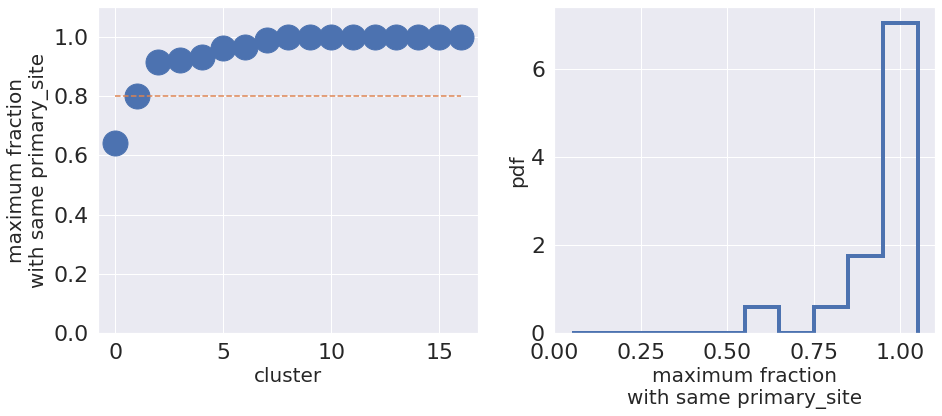

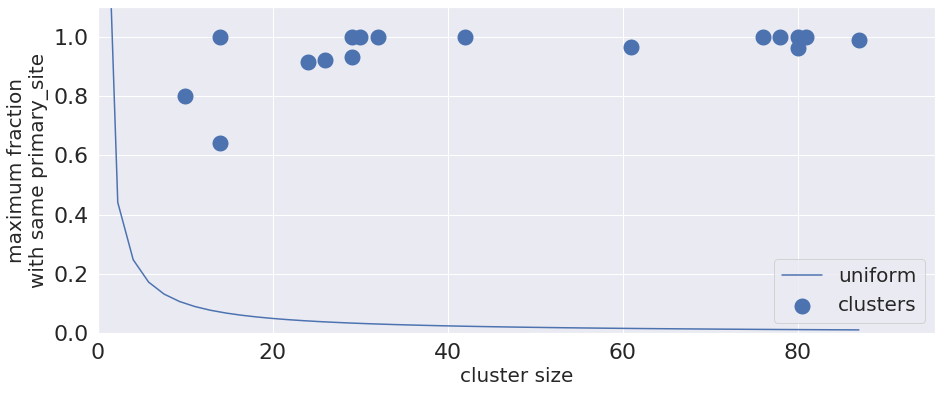

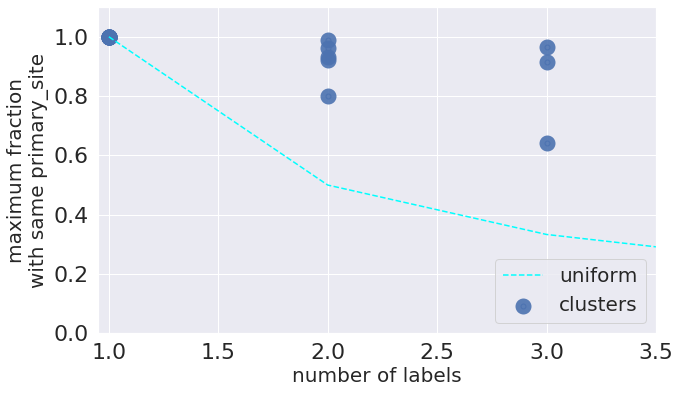

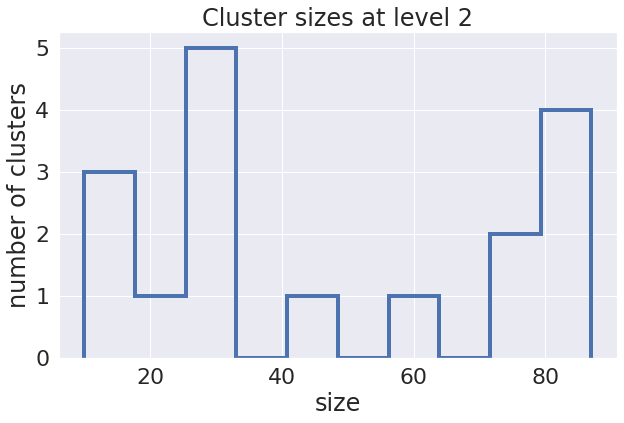

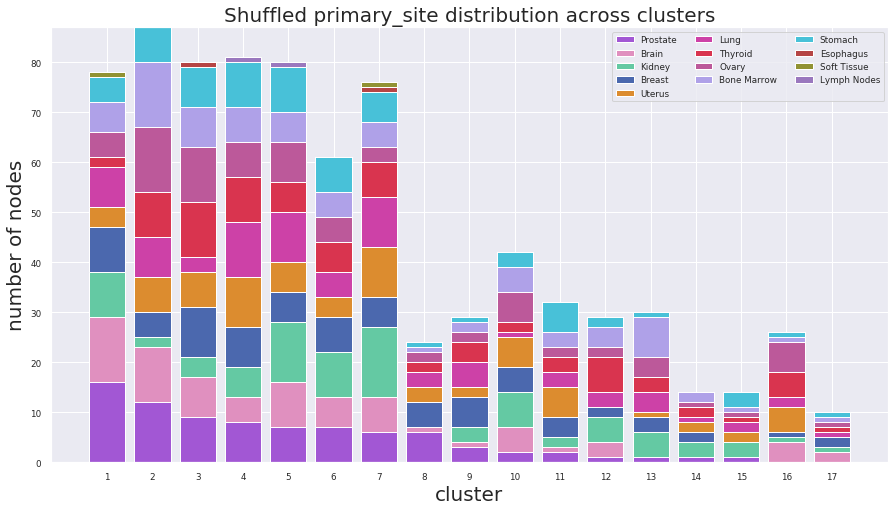

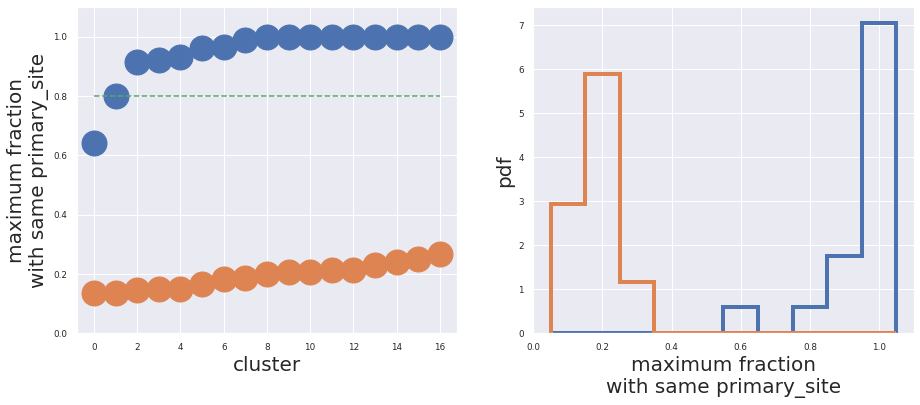

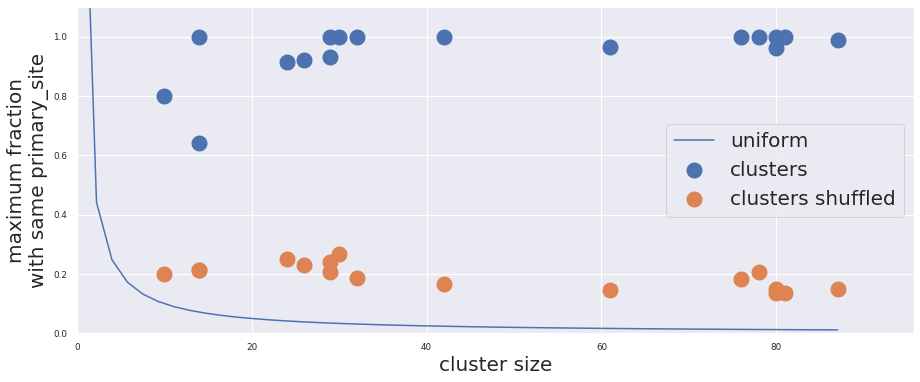

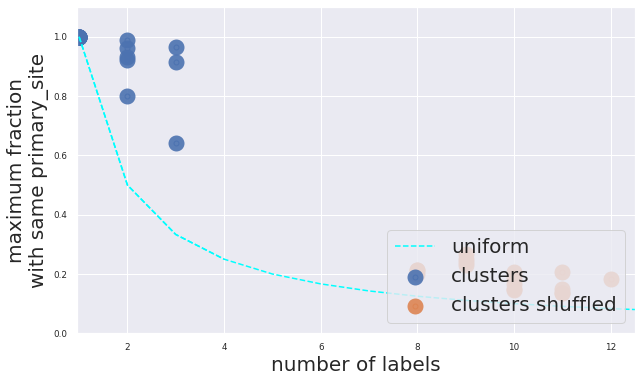

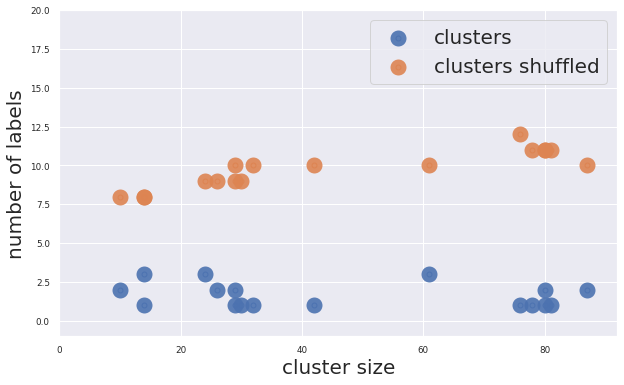

False primary_site 1


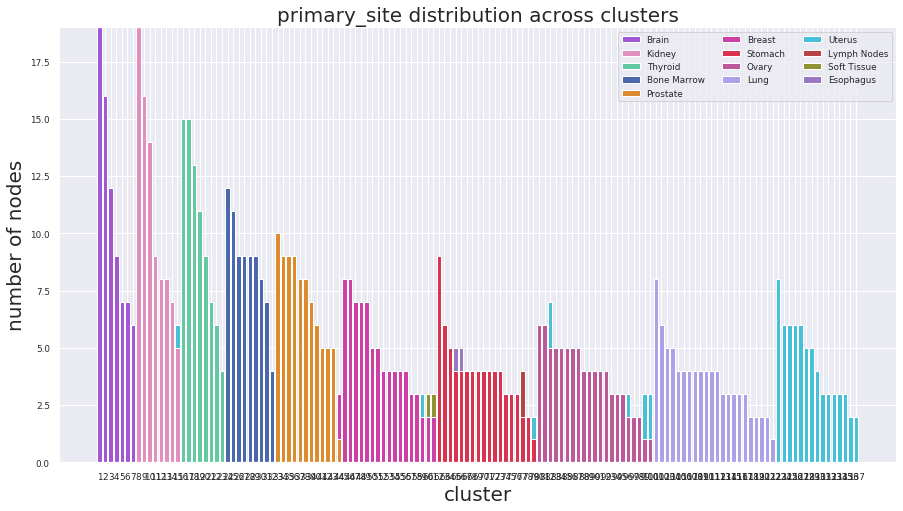

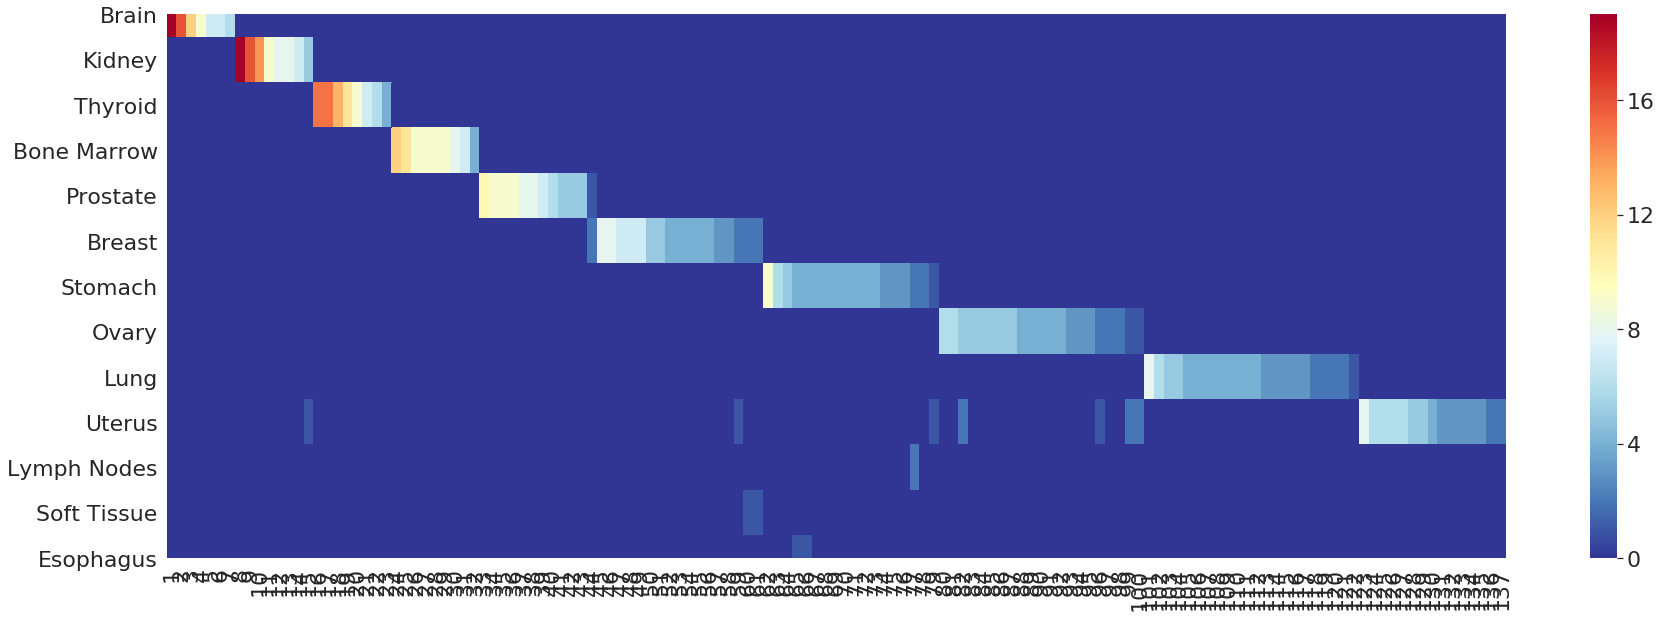

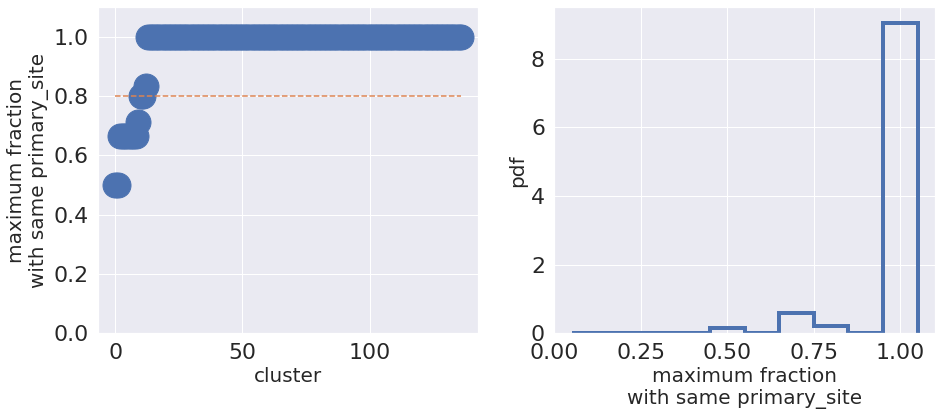

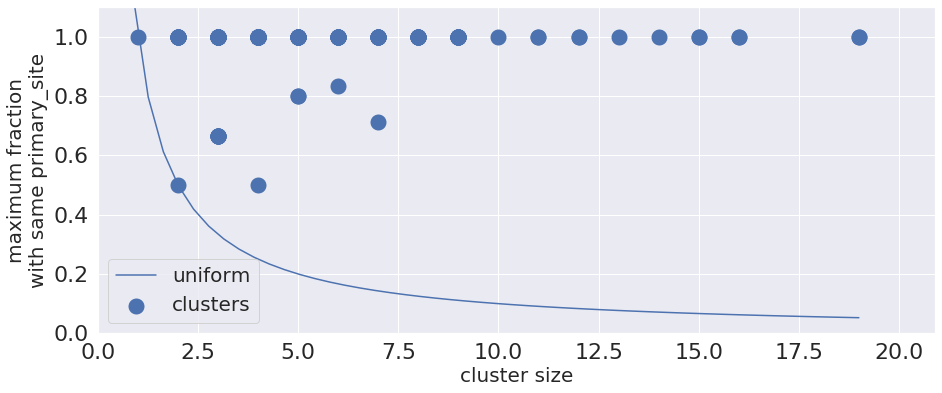

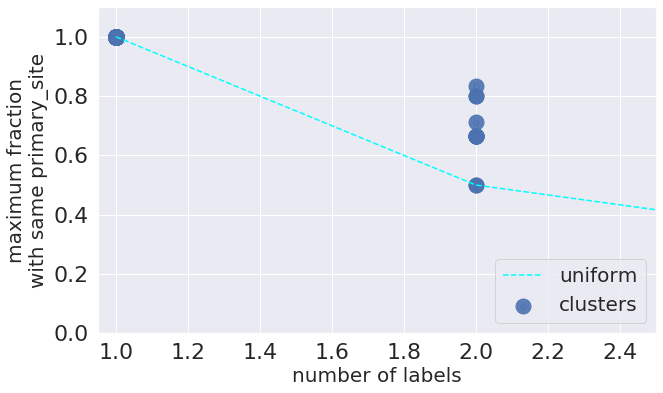

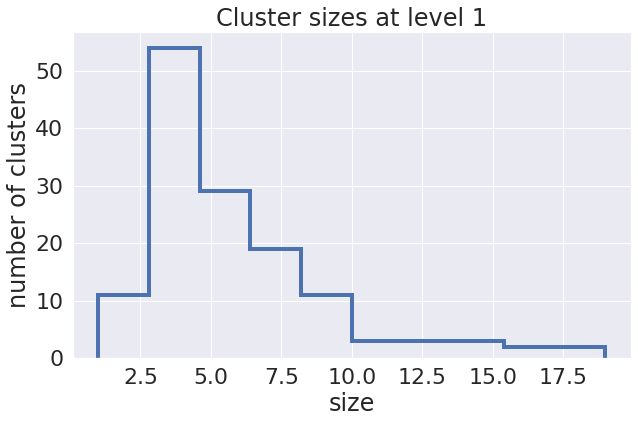

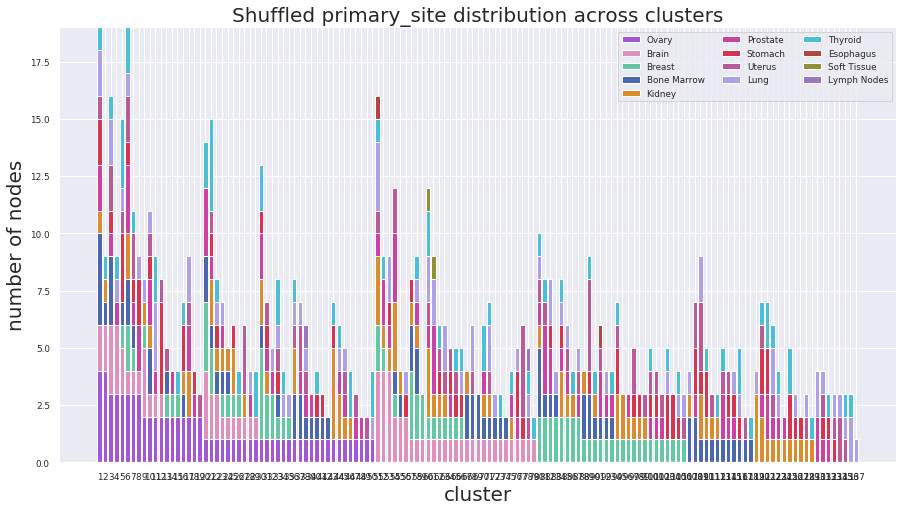

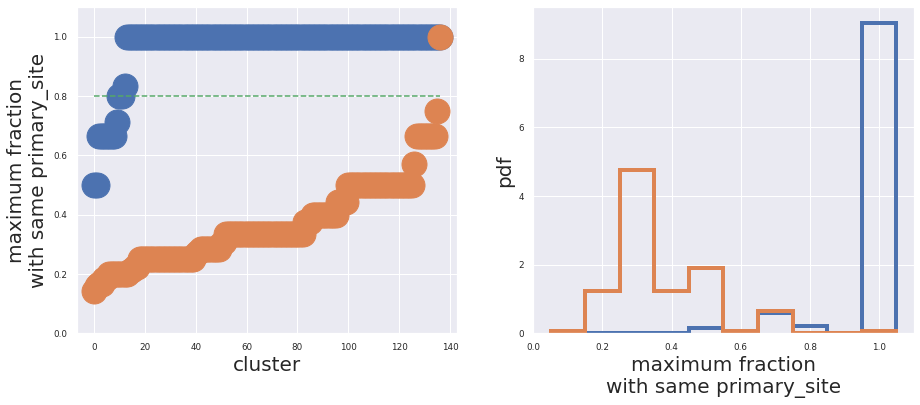

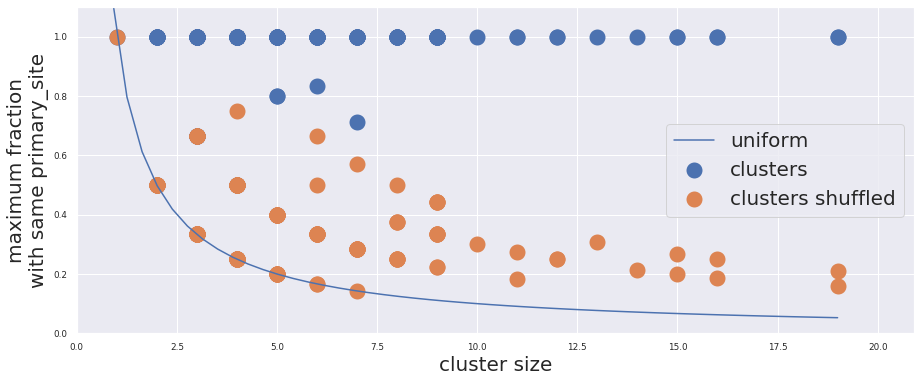

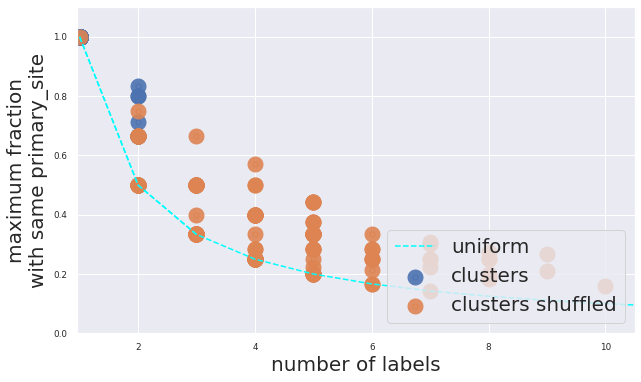

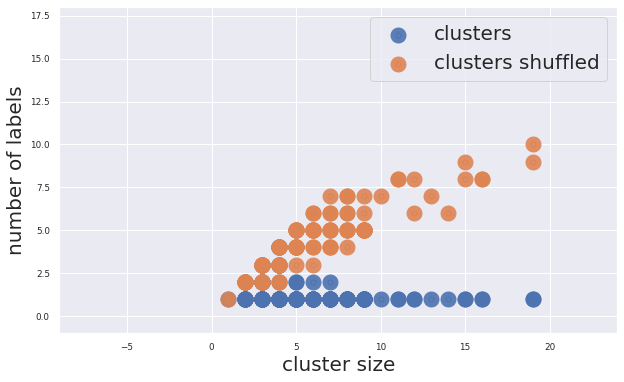

False primary_site 0


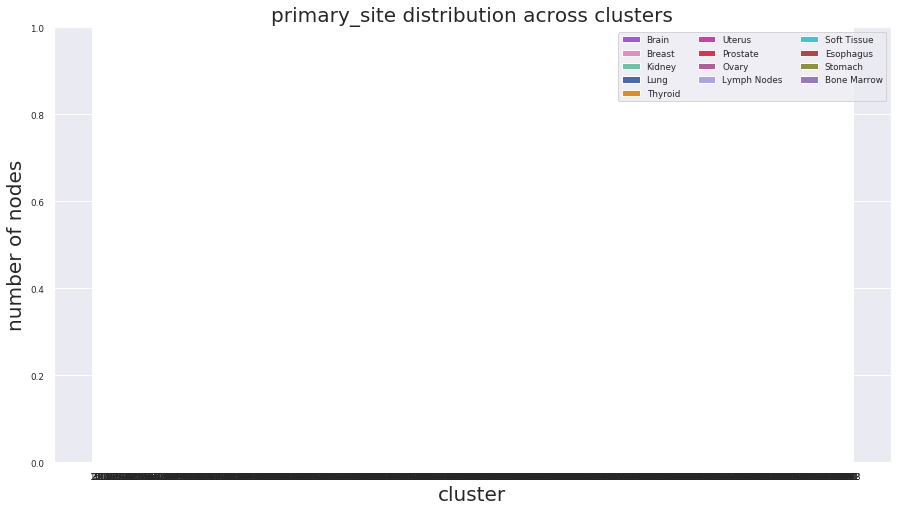

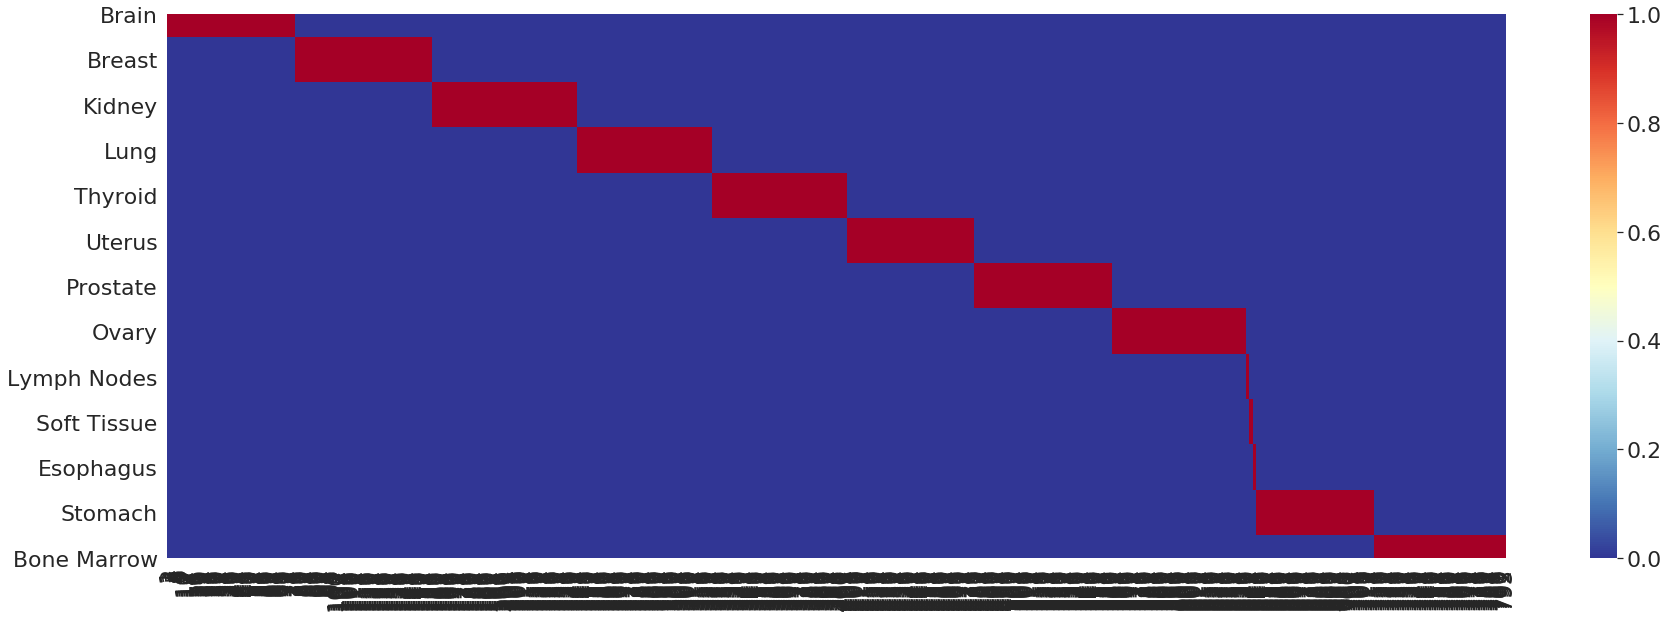

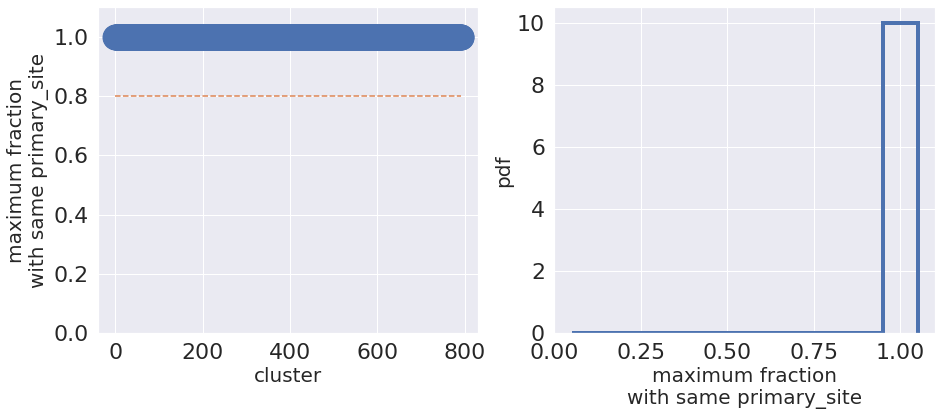

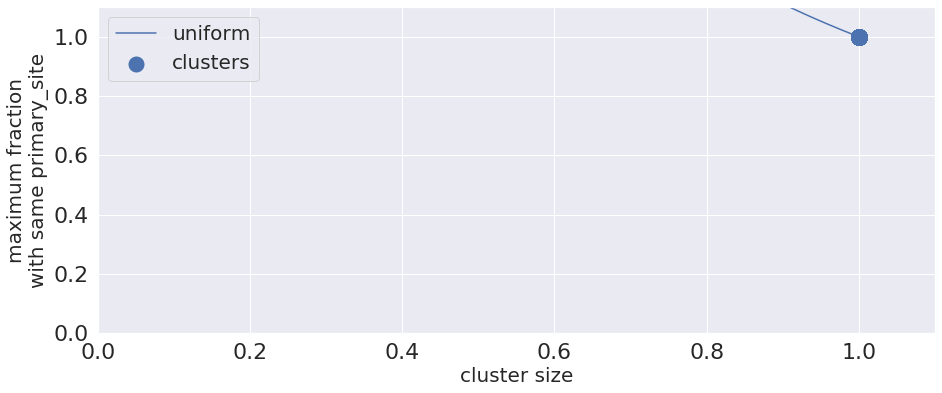

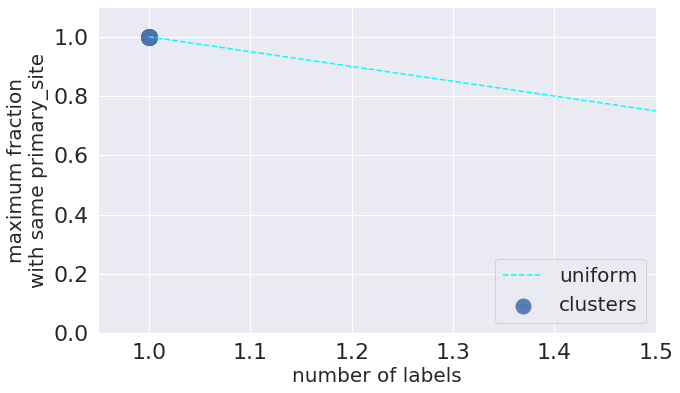

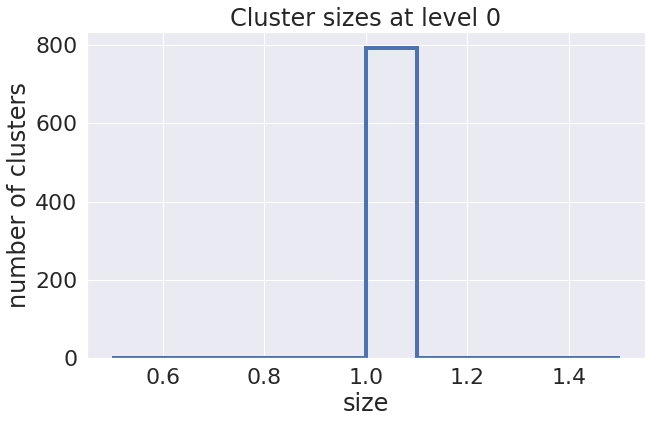

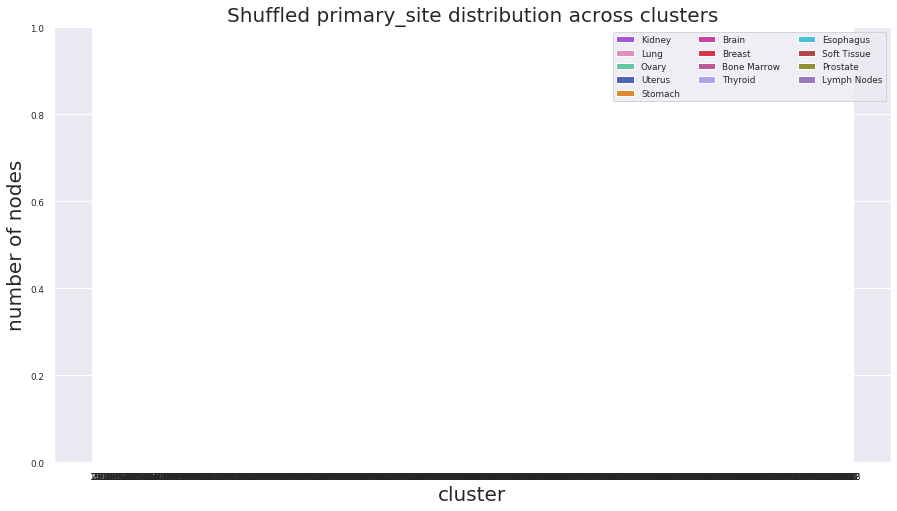

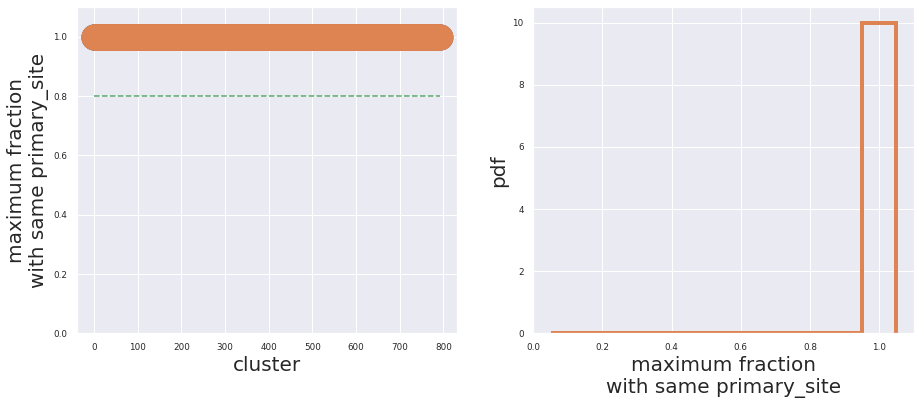

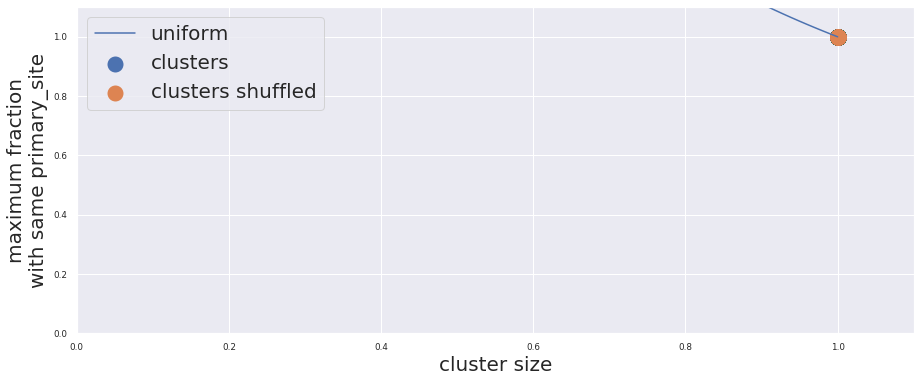

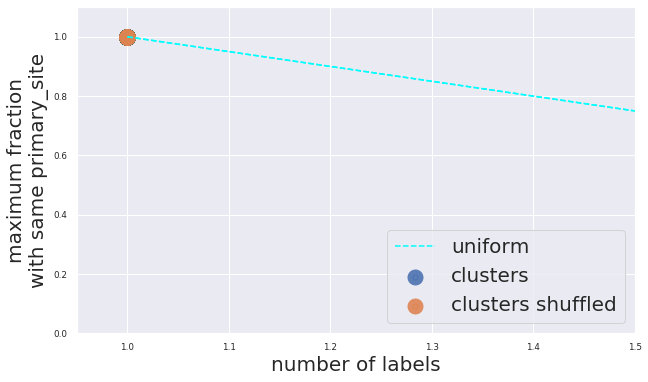

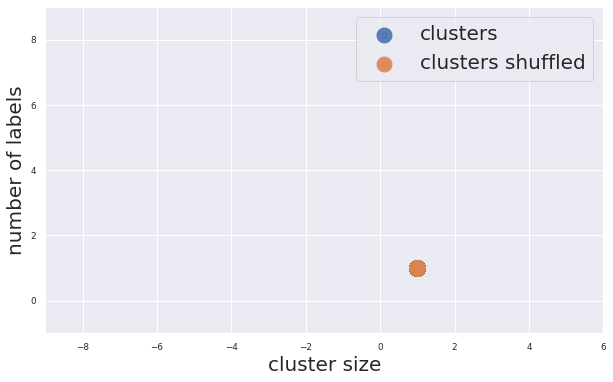

In [9]:
labels = df_file.columns
clusteranalysis(workingdir, labels, l=3)

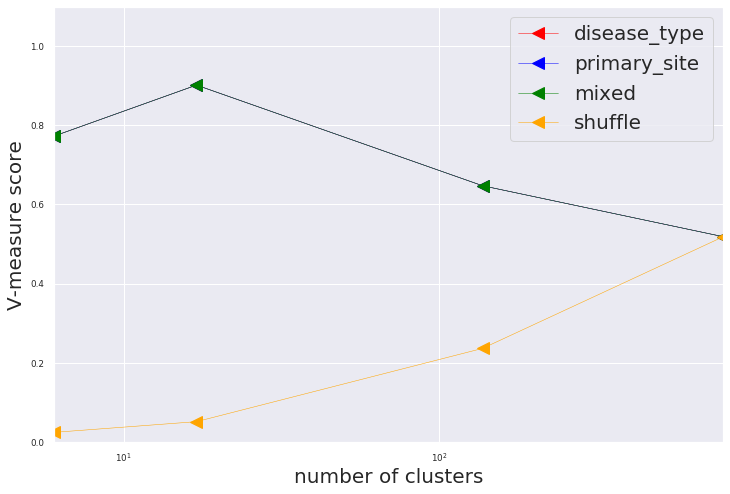

In [10]:
scores = get_scores(workingdir,labels, l=3, verbose=False)
fig=plt.figure(figsize=(12,8))
ax = fig.subplots(1)
add_score_lines(ax,scores,labels=[k for k in scores.keys()],xl=getclustersizesarray(workingdir,l=3))
plt.show()
fig.savefig("%s/metric.pdf"%(workingdir))

In [11]:
geneontology.topicanalysis()

NameError: name 'geneontology' is not defined

# Clean

In [ ]:
os.chdir(workingdir)
os.system("rm -rf data_mining addo.py")